In [1]:
import tensorflow as tf
from tensorflow import keras

/Users/namuongkang/Library/Python/3.5/lib/python/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/namuongkang/Library/Python/3.5/lib/python/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/namuongkang/Library/Python/3.5/lib/python/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/namuongkang/Library/Python/3.5/lib/pyth

In [2]:
import numpy as np
import matplotlib.pyplot as plt

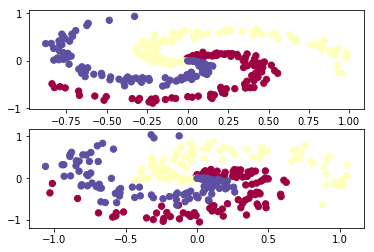

In [263]:
# number of data points per class
N = 100
# dimensionality
D = 2
# number of classes
K = 3

# Data
X_train = np.zeros((N*K,D))
# Label
y_train = np.zeros(N*K, dtype='uint8')

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X_train[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_train[ix] = j

# Test Set
X_test = np.zeros((N*K,D))
y_test = np.zeros(N*K, dtype='uint8')

for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1.1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.4 # theta
  X_test[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y_test[ix] = j

# Data visualization
plt.subplot(2,1,1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.subplot(2,1,2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.show()

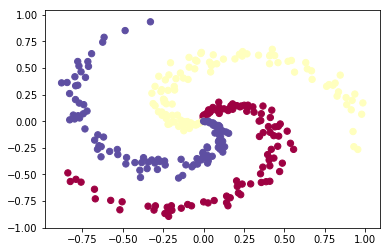

In [264]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)

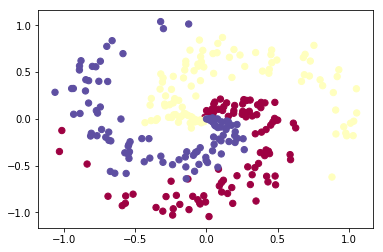

In [265]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)

In [266]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [267]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [268]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
300/300 [==============================] - 0s 332us/sample - loss: 1.0655 - accuracy: 0.4800
Epoch 2/100
300/300 [==============================] - 0s 86us/sample - loss: 1.0316 - accuracy: 0.4933
Epoch 3/100
300/300 [==============================] - 0s 108us/sample - loss: 0.9988 - accuracy: 0.5300
Epoch 4/100
300/300 [==============================] - 0s 114us/sample - loss: 0.9683 - accuracy: 0.5500
Epoch 5/100
300/300 [==============================] - 0s 130us/sample - loss: 0.9402 - accuracy: 0.5467
Epoch 6/100
300/300 [==============================] - 0s 116us/sample - loss: 0.9132 - accuracy: 0.5567
Epoch 7/100
300/300 [==============================] - 0s 113us/sample - loss: 0.8873 - accuracy: 0.5633
Epoch 8/100
300/300 [==============================] - 0s 132us/sample - loss: 0.8633 - accuracy: 0.5633
Epoch 9/100
300/300 [==============================] - 0s 131us/sample - loss: 0.8413 - accuracy: 0.5633
Epoch 10/100
300/300 [==============================] - 

Epoch 79/100
300/300 [==============================] - 0s 73us/sample - loss: 0.4282 - accuracy: 0.8000
Epoch 80/100
300/300 [==============================] - 0s 75us/sample - loss: 0.4234 - accuracy: 0.7933
Epoch 81/100
300/300 [==============================] - 0s 66us/sample - loss: 0.4202 - accuracy: 0.7967
Epoch 82/100
300/300 [==============================] - 0s 67us/sample - loss: 0.4160 - accuracy: 0.8000
Epoch 83/100
300/300 [==============================] - 0s 64us/sample - loss: 0.4121 - accuracy: 0.8100
Epoch 84/100
300/300 [==============================] - 0s 62us/sample - loss: 0.4079 - accuracy: 0.8100
Epoch 85/100
300/300 [==============================] - 0s 62us/sample - loss: 0.4050 - accuracy: 0.8067
Epoch 86/100
300/300 [==============================] - 0s 63us/sample - loss: 0.4005 - accuracy: 0.8033
Epoch 87/100
300/300 [==============================] - 0s 66us/sample - loss: 0.3975 - accuracy: 0.8100
Epoch 88/100
300/300 [==============================] -

In [269]:
model.evaluate(X_test,  y_test, verbose=2)

300/300 - 0s - loss: 0.4431 - accuracy: 0.8067


[0.4430816419919332, 0.8066667]

In [270]:
len(model.layers[0].get_weights()[0]), len(model.layers[0].get_weights()[0][0])

(2, 100)

In [271]:
W = np.matrix(model.layers[0].get_weights()[0])

In [272]:
W.shape

(2, 100)

In [273]:
b = np.array(model.layers[0].get_weights()[1])

In [274]:
b.shape

(100,)

In [275]:
len(model.layers[1].get_weights()[0]), len(model.layers[1].get_weights()[0][0])

(100, 3)

In [276]:
W2 = np.matrix(model.layers[1].get_weights()[0])

In [277]:
W2.shape

(100, 3)

In [278]:
b2 = np.array(model.layers[1].get_weights()[1])

In [279]:
b2.shape

(3,)

In [280]:
predictions = model.predict(X_test)

In [281]:
predictions.shape

(300, 3)

In [282]:
prediction_label = np.amax(predictions, axis=1)

In [283]:
prediction_label.shape

(300,)

In [284]:
print(y_test[10])
print(predictions[10], np.argmax(predictions[10]))

0
[0.37242323 0.4514734  0.17610334] 1


In [285]:
print(y_test[130])
print(predictions[130], np.argmax(predictions[130]))

1
[0.0268348  0.74633807 0.22682711] 1


In [286]:
y_train_predict = model.predict(X_train)

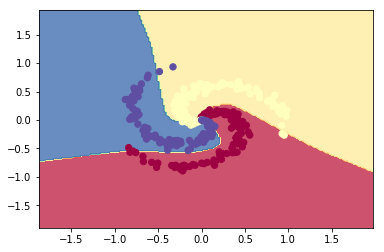

In [287]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

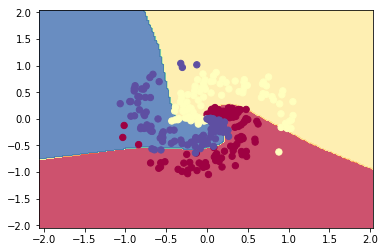

In [288]:
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Model Capacity Test

In [289]:
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [290]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
300/300 [==============================] - 0s 238us/sample - loss: 1.0869 - accuracy: 0.3433
Epoch 2/100
300/300 [==============================] - 0s 45us/sample - loss: 1.0864 - accuracy: 0.3300
Epoch 3/100
300/300 [==============================] - 0s 62us/sample - loss: 1.0859 - accuracy: 0.3300
Epoch 4/100
300/300 [==============================] - 0s 74us/sample - loss: 1.0854 - accuracy: 0.3300
Epoch 5/100
300/300 [==============================] - 0s 73us/sample - loss: 1.0849 - accuracy: 0.3233
Epoch 6/100
300/300 [==============================] - 0s 78us/sample - loss: 1.0844 - accuracy: 0.3267
Epoch 7/100
300/300 [==============================] - 0s 84us/sample - loss: 1.0839 - accuracy: 0.3233
Epoch 8/100
300/300 [==============================] - 0s 83us/sample - loss: 1.0834 - accuracy: 0.3200
Epoch 9/100
300/300 [==============================] - 0s 82us/sample - loss: 1.0829 - accuracy: 0.3233
Epoch 10/100
300/300 [==============================] - 0s 76us

300/300 [==============================] - 0s 50us/sample - loss: 1.0491 - accuracy: 0.5733
Epoch 80/100
300/300 [==============================] - 0s 52us/sample - loss: 1.0487 - accuracy: 0.5633
Epoch 81/100
300/300 [==============================] - 0s 45us/sample - loss: 1.0482 - accuracy: 0.5667
Epoch 82/100
300/300 [==============================] - 0s 55us/sample - loss: 1.0477 - accuracy: 0.5767
Epoch 83/100
300/300 [==============================] - 0s 53us/sample - loss: 1.0472 - accuracy: 0.5833
Epoch 84/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0468 - accuracy: 0.5767
Epoch 85/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0463 - accuracy: 0.5833
Epoch 86/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0459 - accuracy: 0.5833
Epoch 87/100
300/300 [==============================] - 0s 51us/sample - loss: 1.0454 - accuracy: 0.5833
Epoch 88/100
300/300 [==============================] - 0s 49us/samp

In [291]:
model.evaluate(X_test,  y_test, verbose=2)

300/300 - 0s - loss: 1.0386 - accuracy: 0.5733


[1.038554896513621, 0.5733333]

In [292]:
loss, acc = model.evaluate(X_test,  y_test, verbose=2)
print(loss)
print(acc)

300/300 - 0s - loss: 1.0386 - accuracy: 0.5733
1.038554896513621
0.5733333


In [293]:
W = np.matrix(model.layers[0].get_weights()[0])
b = np.array(model.layers[0].get_weights()[1])
W2 = np.matrix(model.layers[1].get_weights()[0])
b2 = np.array(model.layers[1].get_weights()[1])

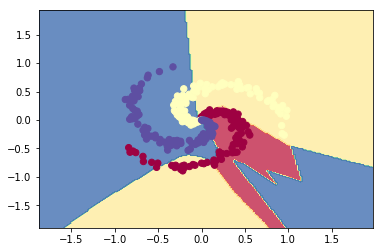

In [294]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

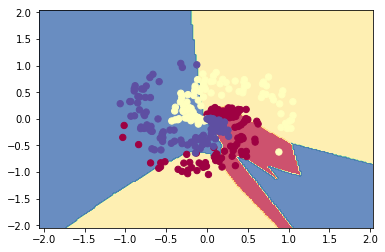

In [295]:
h = 0.02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Adam vs SGD

In [255]:
adam_loss = []
adam_acc = []
for i in range(20):
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    tmp_loss, tmp_acc = model.evaluate(X_test,  y_test, verbose=2)
    
    adam_acc += [tmp_acc]
    adam_loss += [tmp_loss]
    
sgd_loss = []
sgd_acc = []
for i in range(20):
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    tmp_loss, tmp_acc = model.evaluate(X_test,  y_test, verbose=2)

    sgd_acc += [tmp_acc]
    sgd_loss += [tmp_loss]

Epoch 1/100
300/300 [==============================] - 0s 331us/sample - loss: 1.0836 - accuracy: 0.2867
Epoch 2/100
300/300 [==============================] - 0s 85us/sample - loss: 1.0464 - accuracy: 0.4300
Epoch 3/100
300/300 [==============================] - 0s 92us/sample - loss: 1.0129 - accuracy: 0.5700
Epoch 4/100
300/300 [==============================] - 0s 106us/sample - loss: 0.9814 - accuracy: 0.5733
Epoch 5/100
300/300 [==============================] - 0s 101us/sample - loss: 0.9534 - accuracy: 0.5600
Epoch 6/100
300/300 [==============================] - 0s 115us/sample - loss: 0.9250 - accuracy: 0.5733
Epoch 7/100
300/300 [==============================] - 0s 106us/sample - loss: 0.8991 - accuracy: 0.5633
Epoch 8/100
300/300 [==============================] - 0s 102us/sample - loss: 0.8742 - accuracy: 0.5700
Epoch 9/100
300/300 [==============================] - 0s 114us/sample - loss: 0.8504 - accuracy: 0.5667
Epoch 10/100
300/300 [==============================] - 0

300/300 [==============================] - 0s 66us/sample - loss: 0.4156 - accuracy: 0.8000
Epoch 80/100
300/300 [==============================] - 0s 66us/sample - loss: 0.4114 - accuracy: 0.8067
Epoch 81/100
300/300 [==============================] - 0s 73us/sample - loss: 0.4072 - accuracy: 0.8067
Epoch 82/100
300/300 [==============================] - 0s 72us/sample - loss: 0.4035 - accuracy: 0.8133
Epoch 83/100
300/300 [==============================] - 0s 65us/sample - loss: 0.3997 - accuracy: 0.8167
Epoch 84/100
300/300 [==============================] - 0s 58us/sample - loss: 0.3954 - accuracy: 0.8167
Epoch 85/100
300/300 [==============================] - 0s 66us/sample - loss: 0.3916 - accuracy: 0.8267
Epoch 86/100
300/300 [==============================] - 0s 66us/sample - loss: 0.3879 - accuracy: 0.8233
Epoch 87/100
300/300 [==============================] - 0s 63us/sample - loss: 0.3836 - accuracy: 0.8300
Epoch 88/100
300/300 [==============================] - 0s 66us/samp

300/300 [==============================] - 0s 66us/sample - loss: 0.5431 - accuracy: 0.6967
Epoch 57/100
300/300 [==============================] - 0s 67us/sample - loss: 0.5383 - accuracy: 0.7000
Epoch 58/100
300/300 [==============================] - 0s 67us/sample - loss: 0.5341 - accuracy: 0.7033
Epoch 59/100
300/300 [==============================] - 0s 73us/sample - loss: 0.5293 - accuracy: 0.7000
Epoch 60/100
300/300 [==============================] - 0s 66us/sample - loss: 0.5250 - accuracy: 0.7000
Epoch 61/100
300/300 [==============================] - 0s 72us/sample - loss: 0.5203 - accuracy: 0.7067
Epoch 62/100
300/300 [==============================] - 0s 65us/sample - loss: 0.5156 - accuracy: 0.7100
Epoch 63/100
300/300 [==============================] - 0s 62us/sample - loss: 0.5126 - accuracy: 0.7167
Epoch 64/100
300/300 [==============================] - 0s 75us/sample - loss: 0.5069 - accuracy: 0.7200
Epoch 65/100
300/300 [==============================] - 0s 69us/samp

300/300 [==============================] - 0s 64us/sample - loss: 0.6307 - accuracy: 0.6033
Epoch 34/100
300/300 [==============================] - 0s 72us/sample - loss: 0.6264 - accuracy: 0.6067
Epoch 35/100
300/300 [==============================] - 0s 67us/sample - loss: 0.6222 - accuracy: 0.6067
Epoch 36/100
300/300 [==============================] - 0s 69us/sample - loss: 0.6170 - accuracy: 0.6167
Epoch 37/100
300/300 [==============================] - 0s 70us/sample - loss: 0.6124 - accuracy: 0.6133
Epoch 38/100
300/300 [==============================] - 0s 60us/sample - loss: 0.6087 - accuracy: 0.6167
Epoch 39/100
300/300 [==============================] - 0s 64us/sample - loss: 0.6032 - accuracy: 0.6233
Epoch 40/100
300/300 [==============================] - 0s 59us/sample - loss: 0.5992 - accuracy: 0.6267
Epoch 41/100
300/300 [==============================] - 0s 55us/sample - loss: 0.5949 - accuracy: 0.6333
Epoch 42/100
300/300 [==============================] - 0s 66us/samp

300/300 [==============================] - 0s 72us/sample - loss: 0.8431 - accuracy: 0.5567
Epoch 11/100
300/300 [==============================] - 0s 67us/sample - loss: 0.8239 - accuracy: 0.5533
Epoch 12/100
300/300 [==============================] - 0s 72us/sample - loss: 0.8047 - accuracy: 0.5567
Epoch 13/100
300/300 [==============================] - 0s 67us/sample - loss: 0.7889 - accuracy: 0.5567
Epoch 14/100
300/300 [==============================] - 0s 63us/sample - loss: 0.7743 - accuracy: 0.5700
Epoch 15/100
300/300 [==============================] - 0s 64us/sample - loss: 0.7601 - accuracy: 0.5733
Epoch 16/100
300/300 [==============================] - 0s 66us/sample - loss: 0.7474 - accuracy: 0.5733
Epoch 17/100
300/300 [==============================] - 0s 68us/sample - loss: 0.7363 - accuracy: 0.5700
Epoch 18/100
300/300 [==============================] - 0s 57us/sample - loss: 0.7268 - accuracy: 0.5700
Epoch 19/100
300/300 [==============================] - 0s 58us/samp

300/300 [==============================] - 0s 55us/sample - loss: 0.3865 - accuracy: 0.8133
Epoch 89/100
300/300 [==============================] - 0s 58us/sample - loss: 0.3840 - accuracy: 0.8167
Epoch 90/100
300/300 [==============================] - 0s 60us/sample - loss: 0.3807 - accuracy: 0.8133
Epoch 91/100
300/300 [==============================] - 0s 67us/sample - loss: 0.3776 - accuracy: 0.8200
Epoch 92/100
300/300 [==============================] - 0s 59us/sample - loss: 0.3737 - accuracy: 0.8133
Epoch 93/100
300/300 [==============================] - 0s 61us/sample - loss: 0.3704 - accuracy: 0.8267
Epoch 94/100
300/300 [==============================] - 0s 54us/sample - loss: 0.3677 - accuracy: 0.8267
Epoch 95/100
300/300 [==============================] - 0s 58us/sample - loss: 0.3652 - accuracy: 0.8433
Epoch 96/100
300/300 [==============================] - 0s 60us/sample - loss: 0.3619 - accuracy: 0.8433
Epoch 97/100
300/300 [==============================] - 0s 62us/samp

300/300 [==============================] - 0s 58us/sample - loss: 0.4759 - accuracy: 0.7500
Epoch 66/100
300/300 [==============================] - 0s 64us/sample - loss: 0.4726 - accuracy: 0.7467
Epoch 67/100
300/300 [==============================] - 0s 63us/sample - loss: 0.4683 - accuracy: 0.7533
Epoch 68/100
300/300 [==============================] - 0s 64us/sample - loss: 0.4619 - accuracy: 0.7600
Epoch 69/100
300/300 [==============================] - 0s 59us/sample - loss: 0.4580 - accuracy: 0.7600
Epoch 70/100
300/300 [==============================] - 0s 60us/sample - loss: 0.4532 - accuracy: 0.7700
Epoch 71/100
300/300 [==============================] - 0s 65us/sample - loss: 0.4486 - accuracy: 0.7700
Epoch 72/100
300/300 [==============================] - 0s 64us/sample - loss: 0.4443 - accuracy: 0.7733
Epoch 73/100
300/300 [==============================] - 0s 62us/sample - loss: 0.4398 - accuracy: 0.7800
Epoch 74/100
300/300 [==============================] - 0s 62us/samp

300/300 [==============================] - 0s 66us/sample - loss: 0.5826 - accuracy: 0.6467
Epoch 43/100
300/300 [==============================] - 0s 66us/sample - loss: 0.5779 - accuracy: 0.6600
Epoch 44/100
300/300 [==============================] - 0s 72us/sample - loss: 0.5722 - accuracy: 0.6567
Epoch 45/100
300/300 [==============================] - 0s 73us/sample - loss: 0.5671 - accuracy: 0.6600
Epoch 46/100
300/300 [==============================] - 0s 91us/sample - loss: 0.5622 - accuracy: 0.6567
Epoch 47/100
300/300 [==============================] - 0s 88us/sample - loss: 0.5588 - accuracy: 0.6633
Epoch 48/100
300/300 [==============================] - 0s 60us/sample - loss: 0.5524 - accuracy: 0.6733
Epoch 49/100
300/300 [==============================] - 0s 61us/sample - loss: 0.5475 - accuracy: 0.6767
Epoch 50/100
300/300 [==============================] - 0s 61us/sample - loss: 0.5425 - accuracy: 0.6800
Epoch 51/100
300/300 [==============================] - 0s 63us/samp

300/300 [==============================] - 0s 41us/sample - loss: 0.7126 - accuracy: 0.5567
Epoch 20/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7048 - accuracy: 0.5600
Epoch 21/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6979 - accuracy: 0.5600
Epoch 22/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6908 - accuracy: 0.5733
Epoch 23/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6846 - accuracy: 0.5767
Epoch 24/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6783 - accuracy: 0.5867
Epoch 25/100
300/300 [==============================] - 0s 42us/sample - loss: 0.6727 - accuracy: 0.5833
Epoch 26/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6665 - accuracy: 0.5800
Epoch 27/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6615 - accuracy: 0.5800
Epoch 28/100
300/300 [==============================] - 0s 45us/samp

300/300 [==============================] - 0s 42us/sample - loss: 0.3373 - accuracy: 0.8733
Epoch 98/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3338 - accuracy: 0.8733
Epoch 99/100
300/300 [==============================] - 0s 39us/sample - loss: 0.3307 - accuracy: 0.8733
Epoch 100/100
300/300 [==============================] - 0s 40us/sample - loss: 0.3277 - accuracy: 0.8667
300/300 - 0s - loss: 0.5355 - accuracy: 0.7967
Epoch 1/100
300/300 [==============================] - 0s 330us/sample - loss: 1.0801 - accuracy: 0.3800
Epoch 2/100
300/300 [==============================] - 0s 62us/sample - loss: 1.0437 - accuracy: 0.5267
Epoch 3/100
300/300 [==============================] - 0s 63us/sample - loss: 1.0120 - accuracy: 0.5400
Epoch 4/100
300/300 [==============================] - 0s 61us/sample - loss: 0.9812 - accuracy: 0.5467
Epoch 5/100
300/300 [==============================] - 0s 57us/sample - loss: 0.9509 - accuracy: 0.5433
Epoch 6/100
300/300 [===

300/300 [==============================] - 0s 38us/sample - loss: 0.4536 - accuracy: 0.7633
Epoch 75/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4488 - accuracy: 0.7700
Epoch 76/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4444 - accuracy: 0.7700
Epoch 77/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4405 - accuracy: 0.7733
Epoch 78/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4365 - accuracy: 0.7767
Epoch 79/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4324 - accuracy: 0.7800
Epoch 80/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4284 - accuracy: 0.7867
Epoch 81/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4245 - accuracy: 0.7833
Epoch 82/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4202 - accuracy: 0.7900
Epoch 83/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.5326 - accuracy: 0.6933
Epoch 52/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5286 - accuracy: 0.7000
Epoch 53/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5241 - accuracy: 0.6933
Epoch 54/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5188 - accuracy: 0.7033
Epoch 55/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5142 - accuracy: 0.7100
Epoch 56/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5096 - accuracy: 0.7167
Epoch 57/100
300/300 [==============================] - 0s 44us/sample - loss: 0.5050 - accuracy: 0.7167
Epoch 58/100
300/300 [==============================] - 0s 40us/sample - loss: 0.4999 - accuracy: 0.7233
Epoch 59/100
300/300 [==============================] - 0s 41us/sample - loss: 0.4955 - accuracy: 0.7200
Epoch 60/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 42us/sample - loss: 0.6492 - accuracy: 0.5933
Epoch 29/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6437 - accuracy: 0.6067
Epoch 30/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6391 - accuracy: 0.6000
Epoch 31/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6344 - accuracy: 0.6000
Epoch 32/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6294 - accuracy: 0.6000
Epoch 33/100
300/300 [==============================] - 0s 42us/sample - loss: 0.6245 - accuracy: 0.6000
Epoch 34/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6195 - accuracy: 0.6067
Epoch 35/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6147 - accuracy: 0.6100
Epoch 36/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6098 - accuracy: 0.6200
Epoch 37/100
300/300 [==============================] - 0s 41us/samp

300/300 [==============================] - 0s 64us/sample - loss: 0.9427 - accuracy: 0.5467
Epoch 6/100
300/300 [==============================] - 0s 71us/sample - loss: 0.9155 - accuracy: 0.5433
Epoch 7/100
300/300 [==============================] - 0s 64us/sample - loss: 0.8902 - accuracy: 0.5600
Epoch 8/100
300/300 [==============================] - 0s 63us/sample - loss: 0.8651 - accuracy: 0.5633
Epoch 9/100
300/300 [==============================] - 0s 64us/sample - loss: 0.8426 - accuracy: 0.5600
Epoch 10/100
300/300 [==============================] - 0s 57us/sample - loss: 0.8213 - accuracy: 0.5533
Epoch 11/100
300/300 [==============================] - 0s 40us/sample - loss: 0.8024 - accuracy: 0.5567
Epoch 12/100
300/300 [==============================] - 0s 43us/sample - loss: 0.7850 - accuracy: 0.5533
Epoch 13/100
300/300 [==============================] - 0s 47us/sample - loss: 0.7705 - accuracy: 0.5533
Epoch 14/100
300/300 [==============================] - 0s 41us/sample -

300/300 [==============================] - 0s 37us/sample - loss: 0.3958 - accuracy: 0.8067
Epoch 84/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3910 - accuracy: 0.8033
Epoch 85/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3879 - accuracy: 0.8100
Epoch 86/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3842 - accuracy: 0.8133
Epoch 87/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3806 - accuracy: 0.8167
Epoch 88/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3777 - accuracy: 0.8200
Epoch 89/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3737 - accuracy: 0.8167
Epoch 90/100
300/300 [==============================] - 0s 35us/sample - loss: 0.3703 - accuracy: 0.8267
Epoch 91/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3677 - accuracy: 0.8267
Epoch 92/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 39us/sample - loss: 0.4835 - accuracy: 0.7467
Epoch 61/100
300/300 [==============================] - 0s 44us/sample - loss: 0.4782 - accuracy: 0.7533
Epoch 62/100
300/300 [==============================] - 0s 43us/sample - loss: 0.4735 - accuracy: 0.7533
Epoch 63/100
300/300 [==============================] - 0s 50us/sample - loss: 0.4697 - accuracy: 0.7633
Epoch 64/100
300/300 [==============================] - 0s 63us/sample - loss: 0.4643 - accuracy: 0.7567
Epoch 65/100
300/300 [==============================] - 0s 48us/sample - loss: 0.4597 - accuracy: 0.7567
Epoch 66/100
300/300 [==============================] - 0s 49us/sample - loss: 0.4548 - accuracy: 0.7600
Epoch 67/100
300/300 [==============================] - 0s 45us/sample - loss: 0.4502 - accuracy: 0.7633
Epoch 68/100
300/300 [==============================] - 0s 56us/sample - loss: 0.4451 - accuracy: 0.7667
Epoch 69/100
300/300 [==============================] - 0s 50us/samp

300/300 [==============================] - 0s 61us/sample - loss: 0.6178 - accuracy: 0.6167
Epoch 38/100
300/300 [==============================] - 0s 65us/sample - loss: 0.6126 - accuracy: 0.6167
Epoch 39/100
300/300 [==============================] - 0s 67us/sample - loss: 0.6081 - accuracy: 0.6167
Epoch 40/100
300/300 [==============================] - 0s 57us/sample - loss: 0.6034 - accuracy: 0.6200
Epoch 41/100
300/300 [==============================] - 0s 61us/sample - loss: 0.5989 - accuracy: 0.6233
Epoch 42/100
300/300 [==============================] - 0s 61us/sample - loss: 0.5944 - accuracy: 0.6233
Epoch 43/100
300/300 [==============================] - 0s 63us/sample - loss: 0.5906 - accuracy: 0.6300
Epoch 44/100
300/300 [==============================] - 0s 60us/sample - loss: 0.5843 - accuracy: 0.6233
Epoch 45/100
300/300 [==============================] - 0s 64us/sample - loss: 0.5794 - accuracy: 0.6433
Epoch 46/100
300/300 [==============================] - 0s 60us/samp

300/300 [==============================] - 0s 41us/sample - loss: 0.7576 - accuracy: 0.5733
Epoch 15/100
300/300 [==============================] - 0s 44us/sample - loss: 0.7455 - accuracy: 0.5733
Epoch 16/100
300/300 [==============================] - 0s 39us/sample - loss: 0.7346 - accuracy: 0.5700
Epoch 17/100
300/300 [==============================] - 0s 42us/sample - loss: 0.7241 - accuracy: 0.5700
Epoch 18/100
300/300 [==============================] - 0s 38us/sample - loss: 0.7151 - accuracy: 0.5700
Epoch 19/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7067 - accuracy: 0.5733
Epoch 20/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6988 - accuracy: 0.5800
Epoch 21/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6916 - accuracy: 0.5833
Epoch 22/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6853 - accuracy: 0.5833
Epoch 23/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 43us/sample - loss: 0.3641 - accuracy: 0.8300
Epoch 93/100
300/300 [==============================] - 0s 40us/sample - loss: 0.3607 - accuracy: 0.8300
Epoch 94/100
300/300 [==============================] - 0s 40us/sample - loss: 0.3572 - accuracy: 0.8400
Epoch 95/100
300/300 [==============================] - 0s 43us/sample - loss: 0.3539 - accuracy: 0.8400
Epoch 96/100
300/300 [==============================] - 0s 39us/sample - loss: 0.3505 - accuracy: 0.8367
Epoch 97/100
300/300 [==============================] - 0s 40us/sample - loss: 0.3476 - accuracy: 0.8433
Epoch 98/100
300/300 [==============================] - 0s 41us/sample - loss: 0.3444 - accuracy: 0.8433
Epoch 99/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3408 - accuracy: 0.8500
Epoch 100/100
300/300 [==============================] - 0s 42us/sample - loss: 0.3375 - accuracy: 0.8533
300/300 - 0s - loss: 0.5470 - accuracy: 0.7733
Epoch 1/100
300/300 

300/300 [==============================] - 0s 45us/sample - loss: 0.4566 - accuracy: 0.7633
Epoch 70/100
300/300 [==============================] - 0s 45us/sample - loss: 0.4518 - accuracy: 0.7733
Epoch 71/100
300/300 [==============================] - 0s 45us/sample - loss: 0.4472 - accuracy: 0.7733
Epoch 72/100
300/300 [==============================] - 0s 44us/sample - loss: 0.4426 - accuracy: 0.7767
Epoch 73/100
300/300 [==============================] - 0s 42us/sample - loss: 0.4384 - accuracy: 0.7833
Epoch 74/100
300/300 [==============================] - 0s 42us/sample - loss: 0.4338 - accuracy: 0.7933
Epoch 75/100
300/300 [==============================] - 0s 46us/sample - loss: 0.4299 - accuracy: 0.7867
Epoch 76/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4255 - accuracy: 0.7933
Epoch 77/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4203 - accuracy: 0.7900
Epoch 78/100
300/300 [==============================] - 0s 43us/samp

300/300 [==============================] - 0s 41us/sample - loss: 0.5578 - accuracy: 0.6667
Epoch 47/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5528 - accuracy: 0.6733
Epoch 48/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5477 - accuracy: 0.6833
Epoch 49/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5426 - accuracy: 0.6900
Epoch 50/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5378 - accuracy: 0.6933
Epoch 51/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5330 - accuracy: 0.6933
Epoch 52/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5281 - accuracy: 0.6933
Epoch 53/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5224 - accuracy: 0.7000
Epoch 54/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5191 - accuracy: 0.7167
Epoch 55/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 63us/sample - loss: 0.6898 - accuracy: 0.5833
Epoch 24/100
300/300 [==============================] - 0s 55us/sample - loss: 0.6831 - accuracy: 0.5833
Epoch 25/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6764 - accuracy: 0.5833
Epoch 26/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6703 - accuracy: 0.5867
Epoch 27/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6643 - accuracy: 0.5867
Epoch 28/100
300/300 [==============================] - 0s 45us/sample - loss: 0.6585 - accuracy: 0.5933
Epoch 29/100
300/300 [==============================] - 0s 64us/sample - loss: 0.6527 - accuracy: 0.5967
Epoch 30/100
300/300 [==============================] - 0s 62us/sample - loss: 0.6476 - accuracy: 0.6000
Epoch 31/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6418 - accuracy: 0.6033
Epoch 32/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 43us/sample - loss: 0.3367 - accuracy: 0.8633
300/300 - 0s - loss: 0.5401 - accuracy: 0.7800
Epoch 1/100
300/300 [==============================] - 0s 332us/sample - loss: 1.1237 - accuracy: 0.3133
Epoch 2/100
300/300 [==============================] - 0s 65us/sample - loss: 1.0823 - accuracy: 0.4000
Epoch 3/100
300/300 [==============================] - 0s 76us/sample - loss: 1.0463 - accuracy: 0.4867
Epoch 4/100
300/300 [==============================] - 0s 66us/sample - loss: 1.0134 - accuracy: 0.5167
Epoch 5/100
300/300 [==============================] - 0s 75us/sample - loss: 0.9819 - accuracy: 0.5467
Epoch 6/100
300/300 [==============================] - 0s 63us/sample - loss: 0.9539 - accuracy: 0.5400
Epoch 7/100
300/300 [==============================] - 0s 78us/sample - loss: 0.9266 - accuracy: 0.5633
Epoch 8/100
300/300 [==============================] - 0s 71us/sample - loss: 0.9018 - accuracy: 0.5667
Epoch 9/100
300/300 [=======

300/300 [==============================] - 0s 40us/sample - loss: 0.4576 - accuracy: 0.7667
Epoch 78/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4538 - accuracy: 0.7667
Epoch 79/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4493 - accuracy: 0.7700
Epoch 80/100
300/300 [==============================] - 0s 40us/sample - loss: 0.4450 - accuracy: 0.7800
Epoch 81/100
300/300 [==============================] - 0s 42us/sample - loss: 0.4406 - accuracy: 0.7800
Epoch 82/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4368 - accuracy: 0.7800
Epoch 83/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4327 - accuracy: 0.7833
Epoch 84/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4289 - accuracy: 0.7833
Epoch 85/100
300/300 [==============================] - 0s 42us/sample - loss: 0.4253 - accuracy: 0.7900
Epoch 86/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.5109 - accuracy: 0.7067
Epoch 55/100
300/300 [==============================] - ETA: 0s - loss: 0.6194 - accuracy: 0.56 - 0s 35us/sample - loss: 0.5061 - accuracy: 0.7200
Epoch 56/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5010 - accuracy: 0.7267
Epoch 57/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4962 - accuracy: 0.7200
Epoch 58/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4913 - accuracy: 0.7300
Epoch 59/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4868 - accuracy: 0.7367
Epoch 60/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4818 - accuracy: 0.7400
Epoch 61/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4772 - accuracy: 0.7500
Epoch 62/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4727 - accuracy: 0.7600
Epoch 63/100
300/300 [====

300/300 [==============================] - 0s 38us/sample - loss: 0.6409 - accuracy: 0.5933
Epoch 32/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6360 - accuracy: 0.5967
Epoch 33/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6333 - accuracy: 0.6167
Epoch 34/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6274 - accuracy: 0.6100
Epoch 35/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6232 - accuracy: 0.6067
Epoch 36/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6180 - accuracy: 0.6133
Epoch 37/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6142 - accuracy: 0.6167
Epoch 38/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6095 - accuracy: 0.6167
Epoch 39/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6053 - accuracy: 0.6200
Epoch 40/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 43us/sample - loss: 1.0967 - accuracy: 0.4500
Epoch 9/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0961 - accuracy: 0.4533
Epoch 10/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0955 - accuracy: 0.4533
Epoch 11/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0949 - accuracy: 0.4533
Epoch 12/100
300/300 [==============================] - 0s 48us/sample - loss: 1.0943 - accuracy: 0.4533
Epoch 13/100
300/300 [==============================] - 0s 43us/sample - loss: 1.0937 - accuracy: 0.4533
Epoch 14/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0931 - accuracy: 0.4533
Epoch 15/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0924 - accuracy: 0.4533
Epoch 16/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0918 - accuracy: 0.4533
Epoch 17/100
300/300 [==============================] - 0s 40us/sampl

300/300 [==============================] - 0s 35us/sample - loss: 1.0507 - accuracy: 0.4733
Epoch 87/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0502 - accuracy: 0.4767
Epoch 88/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0497 - accuracy: 0.4767
Epoch 89/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0491 - accuracy: 0.4833
Epoch 90/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0486 - accuracy: 0.4867
Epoch 91/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0481 - accuracy: 0.4833
Epoch 92/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0476 - accuracy: 0.4900
Epoch 93/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0470 - accuracy: 0.4900
Epoch 94/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0465 - accuracy: 0.4867
Epoch 95/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 34us/sample - loss: 1.0860 - accuracy: 0.3067
Epoch 64/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0854 - accuracy: 0.3267
Epoch 65/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0848 - accuracy: 0.3333
Epoch 66/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0842 - accuracy: 0.3400
Epoch 67/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0836 - accuracy: 0.3467
Epoch 68/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0830 - accuracy: 0.3567
Epoch 69/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0824 - accuracy: 0.3667
Epoch 70/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0818 - accuracy: 0.3767
Epoch 71/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0812 - accuracy: 0.3833
Epoch 72/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 35us/sample - loss: 1.1099 - accuracy: 0.2200
Epoch 41/100
300/300 [==============================] - 0s 37us/sample - loss: 1.1092 - accuracy: 0.2200
Epoch 42/100
300/300 [==============================] - 0s 37us/sample - loss: 1.1086 - accuracy: 0.2133
Epoch 43/100
300/300 [==============================] - 0s 35us/sample - loss: 1.1079 - accuracy: 0.2200
Epoch 44/100
300/300 [==============================] - 0s 35us/sample - loss: 1.1072 - accuracy: 0.2100
Epoch 45/100
300/300 [==============================] - 0s 39us/sample - loss: 1.1066 - accuracy: 0.2033
Epoch 46/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1059 - accuracy: 0.2000
Epoch 47/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1052 - accuracy: 0.2033
Epoch 48/100
300/300 [==============================] - 0s 34us/sample - loss: 1.1046 - accuracy: 0.1967
Epoch 49/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 39us/sample - loss: 1.1260 - accuracy: 0.3300
Epoch 18/100
300/300 [==============================] - 0s 40us/sample - loss: 1.1253 - accuracy: 0.3300
Epoch 19/100
300/300 [==============================] - 0s 39us/sample - loss: 1.1246 - accuracy: 0.3300
Epoch 20/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1239 - accuracy: 0.3333
Epoch 21/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1232 - accuracy: 0.3300
Epoch 22/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1226 - accuracy: 0.3267
Epoch 23/100
300/300 [==============================] - 0s 37us/sample - loss: 1.1219 - accuracy: 0.3300
Epoch 24/100
300/300 [==============================] - 0s 37us/sample - loss: 1.1212 - accuracy: 0.3300
Epoch 25/100
300/300 [==============================] - 0s 38us/sample - loss: 1.1206 - accuracy: 0.3267
Epoch 26/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 36us/sample - loss: 1.0780 - accuracy: 0.3200
Epoch 96/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0775 - accuracy: 0.3167
Epoch 97/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0769 - accuracy: 0.3167
Epoch 98/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0763 - accuracy: 0.3167
Epoch 99/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0758 - accuracy: 0.3167
Epoch 100/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0752 - accuracy: 0.3200
300/300 - 0s - loss: 1.0780 - accuracy: 0.3100
Epoch 1/100
300/300 [==============================] - 0s 424us/sample - loss: 1.1102 - accuracy: 0.4367
Epoch 2/100
300/300 [==============================] - 0s 71us/sample - loss: 1.1096 - accuracy: 0.4333
Epoch 3/100
300/300 [==============================] - 0s 72us/sample - loss: 1.1091 - accuracy: 0.4333
Epoch 4/100
300/300 [=

300/300 [==============================] - 0s 42us/sample - loss: 1.0703 - accuracy: 0.5167
Epoch 73/100
300/300 [==============================] - 0s 55us/sample - loss: 1.0698 - accuracy: 0.5233
Epoch 74/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0693 - accuracy: 0.5200
Epoch 75/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0687 - accuracy: 0.5200
Epoch 76/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0682 - accuracy: 0.5200
Epoch 77/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0677 - accuracy: 0.5233
Epoch 78/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0672 - accuracy: 0.5233
Epoch 79/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0666 - accuracy: 0.5300
Epoch 80/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0661 - accuracy: 0.5267
Epoch 81/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 35us/sample - loss: 1.0674 - accuracy: 0.5300
Epoch 50/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0669 - accuracy: 0.5300
Epoch 51/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0664 - accuracy: 0.5233
Epoch 52/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0658 - accuracy: 0.5267
Epoch 53/100
300/300 [==============================] - 0s 55us/sample - loss: 1.0653 - accuracy: 0.5267
Epoch 54/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0648 - accuracy: 0.5267
Epoch 55/100
300/300 [==============================] - 0s 47us/sample - loss: 1.0643 - accuracy: 0.5233
Epoch 56/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0638 - accuracy: 0.5233
Epoch 57/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0633 - accuracy: 0.5200
Epoch 58/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 34us/sample - loss: 1.0633 - accuracy: 0.4233
Epoch 27/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0627 - accuracy: 0.4300
Epoch 28/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0622 - accuracy: 0.4400
Epoch 29/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0616 - accuracy: 0.4467
Epoch 30/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0611 - accuracy: 0.4467
Epoch 31/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0605 - accuracy: 0.4433
Epoch 32/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0600 - accuracy: 0.4433
Epoch 33/100
300/300 [==============================] - 0s 33us/sample - loss: 1.0595 - accuracy: 0.4433
Epoch 34/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0589 - accuracy: 0.4433
Epoch 35/100
300/300 [==============================] - 0s 34us/samp

300/300 [==============================] - 0s 44us/sample - loss: 1.1054 - accuracy: 0.2567
Epoch 4/100
300/300 [==============================] - 0s 46us/sample - loss: 1.1048 - accuracy: 0.2500
Epoch 5/100
300/300 [==============================] - 0s 46us/sample - loss: 1.1042 - accuracy: 0.2500
Epoch 6/100
300/300 [==============================] - 0s 45us/sample - loss: 1.1037 - accuracy: 0.2567
Epoch 7/100
300/300 [==============================] - 0s 45us/sample - loss: 1.1031 - accuracy: 0.2567
Epoch 8/100
300/300 [==============================] - 0s 44us/sample - loss: 1.1025 - accuracy: 0.2567
Epoch 9/100
300/300 [==============================] - 0s 48us/sample - loss: 1.1019 - accuracy: 0.2667
Epoch 10/100
300/300 [==============================] - 0s 43us/sample - loss: 1.1014 - accuracy: 0.2667
Epoch 11/100
300/300 [==============================] - 0s 44us/sample - loss: 1.1008 - accuracy: 0.2767
Epoch 12/100
300/300 [==============================] - 0s 38us/sample - l

300/300 [==============================] - 0s 38us/sample - loss: 1.0613 - accuracy: 0.5133
Epoch 82/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0608 - accuracy: 0.5200
Epoch 83/100
300/300 [==============================] - 0s 33us/sample - loss: 1.0602 - accuracy: 0.5267
Epoch 84/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0597 - accuracy: 0.5433
Epoch 85/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0591 - accuracy: 0.5467
Epoch 86/100
300/300 [==============================] - 0s 33us/sample - loss: 1.0586 - accuracy: 0.5500
Epoch 87/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0581 - accuracy: 0.5567
Epoch 88/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0576 - accuracy: 0.5600
Epoch 89/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0570 - accuracy: 0.5600
Epoch 90/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 39us/sample - loss: 1.0860 - accuracy: 0.4733
Epoch 59/100
300/300 [==============================] - 0s 53us/sample - loss: 1.0855 - accuracy: 0.4667
Epoch 60/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0849 - accuracy: 0.4733
Epoch 61/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0843 - accuracy: 0.4733
Epoch 62/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0838 - accuracy: 0.4700
Epoch 63/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0833 - accuracy: 0.4767
Epoch 64/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0827 - accuracy: 0.4700
Epoch 65/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0822 - accuracy: 0.4700
Epoch 66/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0816 - accuracy: 0.4733
Epoch 67/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 38us/sample - loss: 1.0787 - accuracy: 0.4200
Epoch 36/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0782 - accuracy: 0.4200
Epoch 37/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0777 - accuracy: 0.4200
Epoch 38/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0771 - accuracy: 0.4200
Epoch 39/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0766 - accuracy: 0.4233
Epoch 40/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0761 - accuracy: 0.4233
Epoch 41/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0756 - accuracy: 0.4200
Epoch 42/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0750 - accuracy: 0.4267
Epoch 43/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0745 - accuracy: 0.4233
Epoch 44/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 42us/sample - loss: 1.0759 - accuracy: 0.4633
Epoch 13/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0754 - accuracy: 0.4733
Epoch 14/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0748 - accuracy: 0.4733
Epoch 15/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0743 - accuracy: 0.4733
Epoch 16/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0738 - accuracy: 0.4733
Epoch 17/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0732 - accuracy: 0.4767
Epoch 18/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0727 - accuracy: 0.4767
Epoch 19/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0722 - accuracy: 0.4733
Epoch 20/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0716 - accuracy: 0.4700
Epoch 21/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 35us/sample - loss: 1.0353 - accuracy: 0.5333
Epoch 91/100
300/300 [==============================] - 0s 33us/sample - loss: 1.0348 - accuracy: 0.5333
Epoch 92/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0343 - accuracy: 0.5333
Epoch 93/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0338 - accuracy: 0.5333
Epoch 94/100
300/300 [==============================] - 0s 33us/sample - loss: 1.0333 - accuracy: 0.5333
Epoch 95/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0328 - accuracy: 0.5367
Epoch 96/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0324 - accuracy: 0.5333
Epoch 97/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0319 - accuracy: 0.5333
Epoch 98/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0314 - accuracy: 0.5333
Epoch 99/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 35us/sample - loss: 1.0651 - accuracy: 0.4667
Epoch 68/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0646 - accuracy: 0.4700
Epoch 69/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0640 - accuracy: 0.4733
Epoch 70/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0634 - accuracy: 0.4733
Epoch 71/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0629 - accuracy: 0.4733
Epoch 72/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0623 - accuracy: 0.4767
Epoch 73/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0617 - accuracy: 0.4767
Epoch 74/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0612 - accuracy: 0.4767
Epoch 75/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0606 - accuracy: 0.4767
Epoch 76/100
300/300 [==============================] - 0s 56us/samp

300/300 [==============================] - 0s 36us/sample - loss: 1.0726 - accuracy: 0.4567
Epoch 45/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0720 - accuracy: 0.4567
Epoch 46/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0715 - accuracy: 0.4633
Epoch 47/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0709 - accuracy: 0.4767
Epoch 48/100
300/300 [==============================] - 0s 43us/sample - loss: 1.0704 - accuracy: 0.4800
Epoch 49/100
300/300 [==============================] - 0s 54us/sample - loss: 1.0699 - accuracy: 0.4967
Epoch 50/100
300/300 [==============================] - 0s 68us/sample - loss: 1.0693 - accuracy: 0.4967
Epoch 51/100
300/300 [==============================] - 0s 60us/sample - loss: 1.0688 - accuracy: 0.5000
Epoch 52/100
300/300 [==============================] - 0s 53us/sample - loss: 1.0682 - accuracy: 0.5033
Epoch 53/100
300/300 [==============================] - 0s 56us/samp

300/300 [==============================] - 0s 43us/sample - loss: 1.0725 - accuracy: 0.2933
Epoch 22/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0720 - accuracy: 0.2933
Epoch 23/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0716 - accuracy: 0.2967
Epoch 24/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0711 - accuracy: 0.3000
Epoch 25/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0706 - accuracy: 0.2967
Epoch 26/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0701 - accuracy: 0.2967
Epoch 27/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0696 - accuracy: 0.2967
Epoch 28/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0691 - accuracy: 0.2967
Epoch 29/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0687 - accuracy: 0.2933
Epoch 30/100
300/300 [==============================] - 0s 42us/samp

300/300 [==============================] - 0s 38us/sample - loss: 1.0367 - accuracy: 0.4400
Epoch 100/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0362 - accuracy: 0.4433
300/300 - 0s - loss: 1.0437 - accuracy: 0.3867
Epoch 1/100
300/300 [==============================] - 0s 252us/sample - loss: 1.1231 - accuracy: 0.1933
Epoch 2/100
300/300 [==============================] - 0s 47us/sample - loss: 1.1224 - accuracy: 0.1933
Epoch 3/100
300/300 [==============================] - 0s 49us/sample - loss: 1.1218 - accuracy: 0.2033
Epoch 4/100
300/300 [==============================] - 0s 47us/sample - loss: 1.1212 - accuracy: 0.2067
Epoch 5/100
300/300 [==============================] - 0s 47us/sample - loss: 1.1205 - accuracy: 0.2000
Epoch 6/100
300/300 [==============================] - 0s 46us/sample - loss: 1.1199 - accuracy: 0.1967
Epoch 7/100
300/300 [==============================] - 0s 47us/sample - loss: 1.1192 - accuracy: 0.1900
Epoch 8/100
300/300 [=====

300/300 [==============================] - 0s 37us/sample - loss: 1.0764 - accuracy: 0.4800
Epoch 77/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0758 - accuracy: 0.4800
Epoch 78/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0752 - accuracy: 0.4800
Epoch 79/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0747 - accuracy: 0.4800
Epoch 80/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0741 - accuracy: 0.4767
Epoch 81/100
300/300 [==============================] - 0s 38us/sample - loss: 1.0735 - accuracy: 0.4800
Epoch 82/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0729 - accuracy: 0.4800
Epoch 83/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0724 - accuracy: 0.4833
Epoch 84/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0718 - accuracy: 0.4800
Epoch 85/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 56us/sample - loss: 1.0837 - accuracy: 0.3700
Epoch 54/100
300/300 [==============================] - 0s 52us/sample - loss: 1.0831 - accuracy: 0.3667
Epoch 55/100
300/300 [==============================] - 0s 51us/sample - loss: 1.0826 - accuracy: 0.3667
Epoch 56/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0820 - accuracy: 0.3700
Epoch 57/100
300/300 [==============================] - 0s 42us/sample - loss: 1.0815 - accuracy: 0.3700
Epoch 58/100
300/300 [==============================] - 0s 39us/sample - loss: 1.0809 - accuracy: 0.3733
Epoch 59/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0804 - accuracy: 0.3733
Epoch 60/100
300/300 [==============================] - 0s 55us/sample - loss: 1.0798 - accuracy: 0.3733
Epoch 61/100
300/300 [==============================] - 0s 92us/sample - loss: 1.0793 - accuracy: 0.3733
Epoch 62/100
300/300 [==============================] - 0s 56us/samp

300/300 [==============================] - 0s 41us/sample - loss: 1.0866 - accuracy: 0.4033
Epoch 31/100
300/300 [==============================] - 0s 44us/sample - loss: 1.0860 - accuracy: 0.4067
Epoch 32/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0853 - accuracy: 0.4133
Epoch 33/100
300/300 [==============================] - 0s 59us/sample - loss: 1.0847 - accuracy: 0.4233
Epoch 34/100
300/300 [==============================] - 0s 65us/sample - loss: 1.0841 - accuracy: 0.4300
Epoch 35/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0834 - accuracy: 0.4333
Epoch 36/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0828 - accuracy: 0.4500
Epoch 37/100
300/300 [==============================] - 0s 41us/sample - loss: 1.0821 - accuracy: 0.4733
Epoch 38/100
300/300 [==============================] - 0s 40us/sample - loss: 1.0815 - accuracy: 0.4733
Epoch 39/100
300/300 [==============================] - 0s 39us/samp

300/300 [==============================] - 0s 52us/sample - loss: 1.1170 - accuracy: 0.2867
Epoch 8/100
300/300 [==============================] - 0s 55us/sample - loss: 1.1163 - accuracy: 0.2933
Epoch 9/100
300/300 [==============================] - 0s 47us/sample - loss: 1.1157 - accuracy: 0.2933
Epoch 10/100
300/300 [==============================] - 0s 48us/sample - loss: 1.1150 - accuracy: 0.3033
Epoch 11/100
300/300 [==============================] - 0s 41us/sample - loss: 1.1143 - accuracy: 0.3100
Epoch 12/100
300/300 [==============================] - 0s 37us/sample - loss: 1.1137 - accuracy: 0.3067
Epoch 13/100
300/300 [==============================] - 0s 34us/sample - loss: 1.1130 - accuracy: 0.3100
Epoch 14/100
300/300 [==============================] - 0s 35us/sample - loss: 1.1123 - accuracy: 0.3167
Epoch 15/100
300/300 [==============================] - 0s 36us/sample - loss: 1.1117 - accuracy: 0.3233
Epoch 16/100
300/300 [==============================] - 0s 35us/sample

300/300 [==============================] - 0s 38us/sample - loss: 1.0709 - accuracy: 0.4867
Epoch 86/100
300/300 [==============================] - 0s 34us/sample - loss: 1.0704 - accuracy: 0.4900
Epoch 87/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0699 - accuracy: 0.4900
Epoch 88/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0694 - accuracy: 0.4933
Epoch 89/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0689 - accuracy: 0.5000
Epoch 90/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0684 - accuracy: 0.5033
Epoch 91/100
300/300 [==============================] - 0s 35us/sample - loss: 1.0679 - accuracy: 0.4833
Epoch 92/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0674 - accuracy: 0.4800
Epoch 93/100
300/300 [==============================] - 0s 37us/sample - loss: 1.0669 - accuracy: 0.4900
Epoch 94/100
300/300 [==============================] - 0s 42us/samp

300/300 [==============================] - 0s 53us/sample - loss: 1.0719 - accuracy: 0.3600
Epoch 63/100
300/300 [==============================] - 0s 69us/sample - loss: 1.0714 - accuracy: 0.3667
Epoch 64/100
300/300 [==============================] - 0s 54us/sample - loss: 1.0708 - accuracy: 0.3733
Epoch 65/100
300/300 [==============================] - 0s 59us/sample - loss: 1.0703 - accuracy: 0.3767
Epoch 66/100
300/300 [==============================] - 0s 57us/sample - loss: 1.0697 - accuracy: 0.3733
Epoch 67/100
300/300 [==============================] - 0s 64us/sample - loss: 1.0692 - accuracy: 0.3700
Epoch 68/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0686 - accuracy: 0.3700
Epoch 69/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0681 - accuracy: 0.3767
Epoch 70/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0675 - accuracy: 0.3833
Epoch 71/100
300/300 [==============================] - 0s 44us/samp

300/300 [==============================] - 0s 38us/sample - loss: 1.0651 - accuracy: 0.5400
Epoch 40/100
300/300 [==============================] - 0s 36us/sample - loss: 1.0645 - accuracy: 0.5333
Epoch 41/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0639 - accuracy: 0.5500
Epoch 42/100
300/300 [==============================] - 0s 56us/sample - loss: 1.0633 - accuracy: 0.5433
Epoch 43/100
300/300 [==============================] - 0s 52us/sample - loss: 1.0627 - accuracy: 0.5533
Epoch 44/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0621 - accuracy: 0.5533
Epoch 45/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0616 - accuracy: 0.5500
Epoch 46/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0610 - accuracy: 0.5533
Epoch 47/100
300/300 [==============================] - 0s 45us/sample - loss: 1.0604 - accuracy: 0.5567
Epoch 48/100
300/300 [==============================] - 0s 42us/samp

In [258]:
sgd_loss

[1.0447304018338521,
 1.0690008274714151,
 1.0745466216405233,
 1.0779616530736287,
 1.058158539136251,
 1.0465424092610678,
 1.030871918996175,
 1.0563607708613079,
 1.0687011114756266,
 1.0479103167851767,
 1.0354710006713868,
 1.0503647343317668,
 1.047293071746826,
 1.0437474505106608,
 1.0679641167322795,
 1.064407714207967,
 1.0472710529963176,
 1.0669533650080363,
 1.0516775623957315,
 1.036336046854655]

In [259]:
adam_loss

[0.5351733223597208,
 0.5462853829065959,
 0.5674295576413473,
 0.5776083421707153,
 0.5463580870628357,
 0.5458844033877055,
 0.5354700096448263,
 0.5622874244054159,
 0.5355731534957886,
 0.5535963765780131,
 0.5582200280825297,
 0.54241068760554,
 0.5620180749893189,
 0.5470196874936422,
 0.5363349405924479,
 0.5300056147575378,
 0.5400794092814127,
 0.5794474061330159,
 0.531956406434377,
 0.585443008740743]

In [260]:
sgd_acc

[0.47,
 0.41666666,
 0.39333335,
 0.31,
 0.50333333,
 0.49666667,
 0.48666668,
 0.54,
 0.45666668,
 0.45,
 0.49666667,
 0.50666666,
 0.54333335,
 0.38666666,
 0.47333333,
 0.35,
 0.5233333,
 0.53,
 0.49,
 0.5733333]

In [261]:
adam_acc

[0.79,
 0.7733333,
 0.76666665,
 0.7733333,
 0.77666664,
 0.77666664,
 0.7966667,
 0.76,
 0.79,
 0.78,
 0.7733333,
 0.77666664,
 0.7633333,
 0.7733333,
 0.7866667,
 0.78,
 0.78,
 0.76666665,
 0.79,
 0.75666666]

In [257]:
print('=================================================')
print("Average Accuracy of SGD : ")
print(np.sum(sgd_acc) / 20)
print("Average Accuracy of Adam : ")
print(np.sum(adam_acc) / 20)
print('=================================================')
print("Average Loss of SGD : ")
print(np.sum(sgd_loss) / 20)
print("Average Loss of Adam : ")
print(np.sum(adam_loss) / 20)

Average Accuracy of SGD : 
0.4698333263397217
Average Accuracy of Adam : 
0.7764999389648437
Average Loss of SGD : 
1.0543135342995327
Average Loss of Adam : 
0.5509300661881764


## Overall Average Evaluation of Model Capacity

In [230]:
acc_30 = []
loss_30 = []
for i in range(20):
    model = keras.Sequential([
        keras.layers.Dense(30, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    tmp_loss, tmp_acc = model.evaluate(X_test,  y_test, verbose=2)
    
    acc_30 += [tmp_acc]
    loss_30 += [tmp_loss]
    
acc_100 = []
loss_100 = []
for i in range(20):
    model = keras.Sequential([
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=100)
    tmp_loss, tmp_acc = model.evaluate(X_test,  y_test, verbose=2)

    acc_100 += [tmp_acc]
    loss_100 += [tmp_loss]

Epoch 1/100
300/300 [==============================] - 0s 316us/sample - loss: 1.1606 - accuracy: 0.1067
Epoch 2/100
300/300 [==============================] - 0s 55us/sample - loss: 1.1346 - accuracy: 0.1933
Epoch 3/100
300/300 [==============================] - 0s 65us/sample - loss: 1.1099 - accuracy: 0.3067
Epoch 4/100
300/300 [==============================] - 0s 69us/sample - loss: 1.0867 - accuracy: 0.4200
Epoch 5/100
300/300 [==============================] - 0s 70us/sample - loss: 1.0655 - accuracy: 0.4633
Epoch 6/100
300/300 [==============================] - 0s 73us/sample - loss: 1.0450 - accuracy: 0.4700
Epoch 7/100
300/300 [==============================] - 0s 65us/sample - loss: 1.0258 - accuracy: 0.5033
Epoch 8/100
300/300 [==============================] - 0s 71us/sample - loss: 1.0081 - accuracy: 0.5200
Epoch 9/100
300/300 [==============================] - 0s 69us/sample - loss: 0.9904 - accuracy: 0.5400
Epoch 10/100
300/300 [==============================] - 0s 74us

300/300 [==============================] - 0s 49us/sample - loss: 0.5934 - accuracy: 0.6333
Epoch 80/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5911 - accuracy: 0.6367
Epoch 81/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5885 - accuracy: 0.6400
Epoch 82/100
300/300 [==============================] - 0s 44us/sample - loss: 0.5863 - accuracy: 0.6500
Epoch 83/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5837 - accuracy: 0.6500
Epoch 84/100
300/300 [==============================] - 0s 45us/sample - loss: 0.5810 - accuracy: 0.6500
Epoch 85/100
300/300 [==============================] - 0s 48us/sample - loss: 0.5789 - accuracy: 0.6533
Epoch 86/100
300/300 [==============================] - 0s 50us/sample - loss: 0.5763 - accuracy: 0.6533
Epoch 87/100
300/300 [==============================] - 0s 51us/sample - loss: 0.5738 - accuracy: 0.6533
Epoch 88/100
300/300 [==============================] - 0s 52us/samp

300/300 [==============================] - 0s 67us/sample - loss: 0.6542 - accuracy: 0.6000
Epoch 57/100
300/300 [==============================] - 0s 52us/sample - loss: 0.6515 - accuracy: 0.6067
Epoch 58/100
300/300 [==============================] - 0s 53us/sample - loss: 0.6491 - accuracy: 0.6033
Epoch 59/100
300/300 [==============================] - 0s 54us/sample - loss: 0.6471 - accuracy: 0.6033
Epoch 60/100
300/300 [==============================] - 0s 57us/sample - loss: 0.6445 - accuracy: 0.6033
Epoch 61/100
300/300 [==============================] - 0s 61us/sample - loss: 0.6423 - accuracy: 0.6033
Epoch 62/100
300/300 [==============================] - 0s 81us/sample - loss: 0.6409 - accuracy: 0.6100
Epoch 63/100
300/300 [==============================] - 0s 58us/sample - loss: 0.6385 - accuracy: 0.6100
Epoch 64/100
300/300 [==============================] - 0s 57us/sample - loss: 0.6361 - accuracy: 0.6067
Epoch 65/100
300/300 [==============================] - 0s 55us/samp

300/300 [==============================] - 0s 34us/sample - loss: 0.7442 - accuracy: 0.5500
Epoch 34/100
300/300 [==============================] - 0s 34us/sample - loss: 0.7395 - accuracy: 0.5533
Epoch 35/100
300/300 [==============================] - 0s 38us/sample - loss: 0.7344 - accuracy: 0.5567
Epoch 36/100
300/300 [==============================] - 0s 37us/sample - loss: 0.7301 - accuracy: 0.5567
Epoch 37/100
300/300 [==============================] - 0s 39us/sample - loss: 0.7255 - accuracy: 0.5600
Epoch 38/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7215 - accuracy: 0.5567
Epoch 39/100
300/300 [==============================] - 0s 37us/sample - loss: 0.7179 - accuracy: 0.5633
Epoch 40/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7136 - accuracy: 0.5633
Epoch 41/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7102 - accuracy: 0.5633
Epoch 42/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 45us/sample - loss: 0.9360 - accuracy: 0.5500
Epoch 11/100
300/300 [==============================] - 0s 38us/sample - loss: 0.9191 - accuracy: 0.5600
Epoch 12/100
300/300 [==============================] - 0s 37us/sample - loss: 0.9038 - accuracy: 0.5700
Epoch 13/100
300/300 [==============================] - 0s 35us/sample - loss: 0.8886 - accuracy: 0.5667
Epoch 14/100
300/300 [==============================] - 0s 36us/sample - loss: 0.8735 - accuracy: 0.5700
Epoch 15/100
300/300 [==============================] - 0s 36us/sample - loss: 0.8593 - accuracy: 0.5633
Epoch 16/100
300/300 [==============================] - 0s 39us/sample - loss: 0.8455 - accuracy: 0.5600
Epoch 17/100
300/300 [==============================] - 0s 37us/sample - loss: 0.8328 - accuracy: 0.5600
Epoch 18/100
300/300 [==============================] - 0s 35us/sample - loss: 0.8207 - accuracy: 0.5567
Epoch 19/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 38us/sample - loss: 0.5731 - accuracy: 0.6500
Epoch 89/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5707 - accuracy: 0.6500
Epoch 90/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5679 - accuracy: 0.6600
Epoch 91/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5660 - accuracy: 0.6600
Epoch 92/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5637 - accuracy: 0.6667
Epoch 93/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5612 - accuracy: 0.6667
Epoch 94/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5597 - accuracy: 0.6700
Epoch 95/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5571 - accuracy: 0.6700
Epoch 96/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5548 - accuracy: 0.6667
Epoch 97/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 37us/sample - loss: 0.6481 - accuracy: 0.6100
Epoch 66/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6461 - accuracy: 0.6067
Epoch 67/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6440 - accuracy: 0.6133
Epoch 68/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6413 - accuracy: 0.6133
Epoch 69/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6391 - accuracy: 0.6133
Epoch 70/100
300/300 [==============================] - 0s 33us/sample - loss: 0.6368 - accuracy: 0.6167
Epoch 71/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6344 - accuracy: 0.6167
Epoch 72/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6330 - accuracy: 0.6200
Epoch 73/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6291 - accuracy: 0.6233
Epoch 74/100
300/300 [==============================] - 0s 32us/samp

300/300 [==============================] - 0s 48us/sample - loss: 0.6796 - accuracy: 0.5800
Epoch 43/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6759 - accuracy: 0.5800
Epoch 44/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6724 - accuracy: 0.5800
Epoch 45/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6691 - accuracy: 0.5833
Epoch 46/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6663 - accuracy: 0.5800
Epoch 47/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6629 - accuracy: 0.5833
Epoch 48/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6594 - accuracy: 0.5833
Epoch 49/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6561 - accuracy: 0.5867
Epoch 50/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6533 - accuracy: 0.5900
Epoch 51/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 37us/sample - loss: 0.8256 - accuracy: 0.5567
Epoch 20/100
300/300 [==============================] - 0s 57us/sample - loss: 0.8153 - accuracy: 0.5567
Epoch 21/100
300/300 [==============================] - 0s 38us/sample - loss: 0.8055 - accuracy: 0.5500
Epoch 22/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7960 - accuracy: 0.5467
Epoch 23/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7878 - accuracy: 0.5500
Epoch 24/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7794 - accuracy: 0.5533
Epoch 25/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7715 - accuracy: 0.5533
Epoch 26/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7646 - accuracy: 0.5533
Epoch 27/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7577 - accuracy: 0.5533
Epoch 28/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 36us/sample - loss: 0.5335 - accuracy: 0.6867
Epoch 97/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5311 - accuracy: 0.6867
Epoch 98/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5286 - accuracy: 0.6933
Epoch 99/100
300/300 [==============================] - 0s 33us/sample - loss: 0.5259 - accuracy: 0.6967
Epoch 100/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5233 - accuracy: 0.6967
300/300 - 0s - loss: 0.7072 - accuracy: 0.6033
Epoch 1/100
300/300 [==============================] - 0s 323us/sample - loss: 1.0845 - accuracy: 0.4033
Epoch 2/100
300/300 [==============================] - 0s 43us/sample - loss: 1.0652 - accuracy: 0.4433
Epoch 3/100
300/300 [==============================] - 0s 44us/sample - loss: 1.0471 - accuracy: 0.4533
Epoch 4/100
300/300 [==============================] - 0s 47us/sample - loss: 1.0298 - accuracy: 0.4867
Epoch 5/100
300/300 [==

300/300 [==============================] - 0s 42us/sample - loss: 0.5962 - accuracy: 0.6367
Epoch 74/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5944 - accuracy: 0.6400
Epoch 75/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5913 - accuracy: 0.6367
Epoch 76/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5887 - accuracy: 0.6400
Epoch 77/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5863 - accuracy: 0.6433
Epoch 78/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5843 - accuracy: 0.6400
Epoch 79/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5818 - accuracy: 0.6433
Epoch 80/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5790 - accuracy: 0.6433
Epoch 81/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5771 - accuracy: 0.6400
Epoch 82/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 37us/sample - loss: 0.6657 - accuracy: 0.5967
Epoch 51/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6621 - accuracy: 0.6000
Epoch 52/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6591 - accuracy: 0.6000
Epoch 53/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6556 - accuracy: 0.6067
Epoch 54/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6529 - accuracy: 0.6100
Epoch 55/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6496 - accuracy: 0.6100
Epoch 56/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6468 - accuracy: 0.6100
Epoch 57/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6437 - accuracy: 0.6133
Epoch 58/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6404 - accuracy: 0.6167
Epoch 59/100
300/300 [==============================] - 0s 34us/samp

300/300 [==============================] - 0s 35us/sample - loss: 0.7854 - accuracy: 0.5633
Epoch 28/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7775 - accuracy: 0.5600
Epoch 29/100
300/300 [==============================] - 0s 34us/sample - loss: 0.7698 - accuracy: 0.5633
Epoch 30/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7622 - accuracy: 0.5600
Epoch 31/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7553 - accuracy: 0.5633
Epoch 32/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7488 - accuracy: 0.5667
Epoch 33/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7428 - accuracy: 0.5800
Epoch 34/100
300/300 [==============================] - 0s 34us/sample - loss: 0.7366 - accuracy: 0.5767
Epoch 35/100
300/300 [==============================] - 0s 34us/sample - loss: 0.7311 - accuracy: 0.5767
Epoch 36/100
300/300 [==============================] - 0s 33us/samp

300/300 [==============================] - 0s 50us/sample - loss: 1.0431 - accuracy: 0.4667
Epoch 5/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0284 - accuracy: 0.5133
Epoch 6/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0152 - accuracy: 0.5600
Epoch 7/100
300/300 [==============================] - 0s 43us/sample - loss: 1.0014 - accuracy: 0.5700
Epoch 8/100
300/300 [==============================] - 0s 46us/sample - loss: 0.9889 - accuracy: 0.5833
Epoch 9/100
300/300 [==============================] - 0s 56us/sample - loss: 0.9757 - accuracy: 0.5833
Epoch 10/100
300/300 [==============================] - 0s 51us/sample - loss: 0.9630 - accuracy: 0.5900
Epoch 11/100
300/300 [==============================] - 0s 45us/sample - loss: 0.9503 - accuracy: 0.6100
Epoch 12/100
300/300 [==============================] - 0s 37us/sample - loss: 0.9368 - accuracy: 0.6133
Epoch 13/100
300/300 [==============================] - 0s 40us/sample - 

300/300 [==============================] - 0s 36us/sample - loss: 0.5749 - accuracy: 0.6567
Epoch 83/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5727 - accuracy: 0.6567
Epoch 84/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5702 - accuracy: 0.6600
Epoch 85/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5680 - accuracy: 0.6633
Epoch 86/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5657 - accuracy: 0.6667
Epoch 87/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5635 - accuracy: 0.6667
Epoch 88/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5610 - accuracy: 0.6700
Epoch 89/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5588 - accuracy: 0.6667
Epoch 90/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5570 - accuracy: 0.6700
Epoch 91/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 36us/sample - loss: 0.6501 - accuracy: 0.6000
Epoch 60/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6476 - accuracy: 0.6000
Epoch 61/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6456 - accuracy: 0.5967
Epoch 62/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6431 - accuracy: 0.6033
Epoch 63/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6406 - accuracy: 0.6033
Epoch 64/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6391 - accuracy: 0.6033
Epoch 65/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6360 - accuracy: 0.6100
Epoch 66/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6344 - accuracy: 0.6067
Epoch 67/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6317 - accuracy: 0.6133
Epoch 68/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 35us/sample - loss: 0.7044 - accuracy: 0.5767
Epoch 37/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7005 - accuracy: 0.5800
Epoch 38/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6967 - accuracy: 0.5833
Epoch 39/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6931 - accuracy: 0.5867
Epoch 40/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6899 - accuracy: 0.5800
Epoch 41/100
300/300 [==============================] - 0s 33us/sample - loss: 0.6858 - accuracy: 0.5767
Epoch 42/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6829 - accuracy: 0.5867
Epoch 43/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6794 - accuracy: 0.5867
Epoch 44/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6763 - accuracy: 0.5833
Epoch 45/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.8931 - accuracy: 0.5567
Epoch 14/100
300/300 [==============================] - 0s 52us/sample - loss: 0.8807 - accuracy: 0.5500
Epoch 15/100
300/300 [==============================] - 0s 43us/sample - loss: 0.8688 - accuracy: 0.5500
Epoch 16/100
300/300 [==============================] - 0s 38us/sample - loss: 0.8576 - accuracy: 0.5533
Epoch 17/100
300/300 [==============================] - 0s 36us/sample - loss: 0.8459 - accuracy: 0.5533
Epoch 18/100
300/300 [==============================] - 0s 37us/sample - loss: 0.8356 - accuracy: 0.5533
Epoch 19/100
300/300 [==============================] - 0s 36us/sample - loss: 0.8259 - accuracy: 0.5500
Epoch 20/100
300/300 [==============================] - 0s 37us/sample - loss: 0.8164 - accuracy: 0.5533
Epoch 21/100
300/300 [==============================] - 0s 37us/sample - loss: 0.8077 - accuracy: 0.5533
Epoch 22/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 34us/sample - loss: 0.5527 - accuracy: 0.6733
Epoch 92/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5503 - accuracy: 0.6733
Epoch 93/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5477 - accuracy: 0.6767
Epoch 94/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5455 - accuracy: 0.6767
Epoch 95/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5428 - accuracy: 0.6900
Epoch 96/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5400 - accuracy: 0.6933
Epoch 97/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5373 - accuracy: 0.6867
Epoch 98/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5345 - accuracy: 0.7000
Epoch 99/100
300/300 [==============================] - 0s 34us/sample - loss: 0.5319 - accuracy: 0.7000
Epoch 100/100
300/300 [==============================] - 0s 36us/sam

300/300 [==============================] - 0s 36us/sample - loss: 0.6139 - accuracy: 0.6333
Epoch 69/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6112 - accuracy: 0.6333
Epoch 70/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6076 - accuracy: 0.6333
Epoch 71/100
300/300 [==============================] - 0s 42us/sample - loss: 0.6052 - accuracy: 0.6400
Epoch 72/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6023 - accuracy: 0.6433
Epoch 73/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5993 - accuracy: 0.6367
Epoch 74/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5961 - accuracy: 0.6400
Epoch 75/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5931 - accuracy: 0.6333
Epoch 76/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5908 - accuracy: 0.6400
Epoch 77/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 45us/sample - loss: 0.6624 - accuracy: 0.6033
Epoch 46/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6594 - accuracy: 0.6033
Epoch 47/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6564 - accuracy: 0.6033
Epoch 48/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6536 - accuracy: 0.6000
Epoch 49/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6503 - accuracy: 0.6000
Epoch 50/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6475 - accuracy: 0.6033
Epoch 51/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6451 - accuracy: 0.6067
Epoch 52/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6418 - accuracy: 0.6067
Epoch 53/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6394 - accuracy: 0.6033
Epoch 54/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 37us/sample - loss: 0.7895 - accuracy: 0.5433
Epoch 23/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7819 - accuracy: 0.5433
Epoch 24/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7745 - accuracy: 0.5467
Epoch 25/100
300/300 [==============================] - 0s 37us/sample - loss: 0.7678 - accuracy: 0.5467
Epoch 26/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7613 - accuracy: 0.5533
Epoch 27/100
300/300 [==============================] - 0s 37us/sample - loss: 0.7551 - accuracy: 0.5600
Epoch 28/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7489 - accuracy: 0.5500
Epoch 29/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7432 - accuracy: 0.5467
Epoch 30/100
300/300 [==============================] - 0s 34us/sample - loss: 0.7378 - accuracy: 0.5433
Epoch 31/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.5077 - accuracy: 0.7300
300/300 - 0s - loss: 0.6984 - accuracy: 0.6167
Epoch 1/100
300/300 [==============================] - 0s 305us/sample - loss: 1.1187 - accuracy: 0.2133
Epoch 2/100
300/300 [==============================] - 0s 50us/sample - loss: 1.0955 - accuracy: 0.2367
Epoch 3/100
300/300 [==============================] - 0s 55us/sample - loss: 1.0732 - accuracy: 0.2633
Epoch 4/100
300/300 [==============================] - 0s 49us/sample - loss: 1.0526 - accuracy: 0.3267
Epoch 5/100
300/300 [==============================] - 0s 47us/sample - loss: 1.0329 - accuracy: 0.3567
Epoch 6/100
300/300 [==============================] - 0s 46us/sample - loss: 1.0143 - accuracy: 0.3867
Epoch 7/100
300/300 [==============================] - 0s 44us/sample - loss: 0.9970 - accuracy: 0.4100
Epoch 8/100
300/300 [==============================] - 0s 48us/sample - loss: 0.9802 - accuracy: 0.4333
Epoch 9/100
300/300 [=======

300/300 [==============================] - 0s 39us/sample - loss: 0.5682 - accuracy: 0.6633
Epoch 78/100
300/300 [==============================] - 0s 53us/sample - loss: 0.5653 - accuracy: 0.6600
Epoch 79/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5625 - accuracy: 0.6700
Epoch 80/100
300/300 [==============================] - 0s 34us/sample - loss: 0.5596 - accuracy: 0.6700
Epoch 81/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5566 - accuracy: 0.6667
Epoch 82/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5534 - accuracy: 0.6700
Epoch 83/100
300/300 [==============================] - 0s 36us/sample - loss: 0.5505 - accuracy: 0.6833
Epoch 84/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5477 - accuracy: 0.6867
Epoch 85/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5448 - accuracy: 0.6867
Epoch 86/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 35us/sample - loss: 0.6591 - accuracy: 0.5967
Epoch 55/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6563 - accuracy: 0.6000
Epoch 56/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6536 - accuracy: 0.6000
Epoch 57/100
300/300 [==============================] - 0s 33us/sample - loss: 0.6507 - accuracy: 0.6000
Epoch 58/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6492 - accuracy: 0.6000
Epoch 59/100
300/300 [==============================] - ETA: 0s - loss: 0.6796 - accuracy: 0.53 - 0s 35us/sample - loss: 0.6457 - accuracy: 0.5967
Epoch 60/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6431 - accuracy: 0.6033
Epoch 61/100
300/300 [==============================] - 0s 34us/sample - loss: 0.6403 - accuracy: 0.6000
Epoch 62/100
300/300 [==============================] - 0s 33us/sample - loss: 0.6377 - accuracy: 0.6067
Epoch 63/100
300/300 [====

Epoch 31/100
300/300 [==============================] - 0s 39us/sample - loss: 0.7039 - accuracy: 0.5833
Epoch 32/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6991 - accuracy: 0.5933
Epoch 33/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6946 - accuracy: 0.5933
Epoch 34/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6902 - accuracy: 0.5933
Epoch 35/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6856 - accuracy: 0.5867
Epoch 36/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6814 - accuracy: 0.5867
Epoch 37/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6771 - accuracy: 0.5900
Epoch 38/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6732 - accuracy: 0.5933
Epoch 39/100
300/300 [==============================] - 0s 41us/sample - loss: 0.6693 - accuracy: 0.5967
Epoch 40/100
300/300 [==============================] -

300/300 [==============================] - 0s 59us/sample - loss: 0.8788 - accuracy: 0.5533
Epoch 9/100
300/300 [==============================] - 0s 62us/sample - loss: 0.8561 - accuracy: 0.5567
Epoch 10/100
300/300 [==============================] - 0s 58us/sample - loss: 0.8354 - accuracy: 0.5533
Epoch 11/100
300/300 [==============================] - 0s 55us/sample - loss: 0.8168 - accuracy: 0.5500
Epoch 12/100
300/300 [==============================] - 0s 50us/sample - loss: 0.7989 - accuracy: 0.5533
Epoch 13/100
300/300 [==============================] - 0s 50us/sample - loss: 0.7833 - accuracy: 0.5467
Epoch 14/100
300/300 [==============================] - 0s 48us/sample - loss: 0.7693 - accuracy: 0.5500
Epoch 15/100
300/300 [==============================] - 0s 51us/sample - loss: 0.7572 - accuracy: 0.5567
Epoch 16/100
300/300 [==============================] - 0s 47us/sample - loss: 0.7451 - accuracy: 0.5567
Epoch 17/100
300/300 [==============================] - 0s 46us/sampl

300/300 [==============================] - 0s 54us/sample - loss: 0.3892 - accuracy: 0.8100
Epoch 87/100
300/300 [==============================] - 0s 56us/sample - loss: 0.3848 - accuracy: 0.8133
Epoch 88/100
300/300 [==============================] - 0s 54us/sample - loss: 0.3805 - accuracy: 0.8167
Epoch 89/100
300/300 [==============================] - 0s 62us/sample - loss: 0.3776 - accuracy: 0.8233
Epoch 90/100
300/300 [==============================] - 0s 56us/sample - loss: 0.3747 - accuracy: 0.8267
Epoch 91/100
300/300 [==============================] - 0s 59us/sample - loss: 0.3694 - accuracy: 0.8333
Epoch 92/100
300/300 [==============================] - 0s 60us/sample - loss: 0.3666 - accuracy: 0.8367
Epoch 93/100
300/300 [==============================] - 0s 57us/sample - loss: 0.3622 - accuracy: 0.8367
Epoch 94/100
300/300 [==============================] - 0s 56us/sample - loss: 0.3587 - accuracy: 0.8500
Epoch 95/100
300/300 [==============================] - 0s 55us/samp

300/300 [==============================] - 0s 46us/sample - loss: 0.4899 - accuracy: 0.7300
Epoch 64/100
300/300 [==============================] - 0s 50us/sample - loss: 0.4848 - accuracy: 0.7367
Epoch 65/100
300/300 [==============================] - 0s 55us/sample - loss: 0.4816 - accuracy: 0.7467
Epoch 66/100
300/300 [==============================] - 0s 46us/sample - loss: 0.4765 - accuracy: 0.7467
Epoch 67/100
300/300 [==============================] - 0s 48us/sample - loss: 0.4716 - accuracy: 0.7433
Epoch 68/100
300/300 [==============================] - 0s 49us/sample - loss: 0.4676 - accuracy: 0.7567
Epoch 69/100
300/300 [==============================] - 0s 50us/sample - loss: 0.4622 - accuracy: 0.7633
Epoch 70/100
300/300 [==============================] - 0s 47us/sample - loss: 0.4580 - accuracy: 0.7567
Epoch 71/100
300/300 [==============================] - 0s 49us/sample - loss: 0.4533 - accuracy: 0.7567
Epoch 72/100
300/300 [==============================] - 0s 50us/samp

300/300 [==============================] - 0s 49us/sample - loss: 0.5853 - accuracy: 0.6300
Epoch 41/100
300/300 [==============================] - 0s 50us/sample - loss: 0.5809 - accuracy: 0.6400
Epoch 42/100
300/300 [==============================] - 0s 52us/sample - loss: 0.5761 - accuracy: 0.6367
Epoch 43/100
300/300 [==============================] - 0s 46us/sample - loss: 0.5708 - accuracy: 0.6533
Epoch 44/100
300/300 [==============================] - 0s 51us/sample - loss: 0.5658 - accuracy: 0.6667
Epoch 45/100
300/300 [==============================] - 0s 49us/sample - loss: 0.5599 - accuracy: 0.6633
Epoch 46/100
300/300 [==============================] - 0s 49us/sample - loss: 0.5569 - accuracy: 0.6700
Epoch 47/100
300/300 [==============================] - 0s 48us/sample - loss: 0.5511 - accuracy: 0.6767
Epoch 48/100
300/300 [==============================] - 0s 50us/sample - loss: 0.5457 - accuracy: 0.6733
Epoch 49/100
300/300 [==============================] - 0s 52us/samp

300/300 [==============================] - 0s 47us/sample - loss: 0.7321 - accuracy: 0.5667
Epoch 18/100
300/300 [==============================] - 0s 42us/sample - loss: 0.7232 - accuracy: 0.5633
Epoch 19/100
300/300 [==============================] - 0s 47us/sample - loss: 0.7151 - accuracy: 0.5667
Epoch 20/100
300/300 [==============================] - 0s 42us/sample - loss: 0.7071 - accuracy: 0.5733
Epoch 21/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6993 - accuracy: 0.5700
Epoch 22/100
300/300 [==============================] - 0s 44us/sample - loss: 0.6928 - accuracy: 0.5700
Epoch 23/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6863 - accuracy: 0.5733
Epoch 24/100
300/300 [==============================] - 0s 42us/sample - loss: 0.6798 - accuracy: 0.5833
Epoch 25/100
300/300 [==============================] - 0s 47us/sample - loss: 0.6741 - accuracy: 0.5833
Epoch 26/100
300/300 [==============================] - 0s 43us/samp

300/300 [==============================] - 0s 44us/sample - loss: 0.3669 - accuracy: 0.8333
Epoch 96/100
300/300 [==============================] - 0s 45us/sample - loss: 0.3636 - accuracy: 0.8300
Epoch 97/100
300/300 [==============================] - 0s 47us/sample - loss: 0.3606 - accuracy: 0.8333
Epoch 98/100
300/300 [==============================] - 0s 47us/sample - loss: 0.3579 - accuracy: 0.8467
Epoch 99/100
300/300 [==============================] - 0s 50us/sample - loss: 0.3534 - accuracy: 0.8500
Epoch 100/100
300/300 [==============================] - 0s 48us/sample - loss: 0.3507 - accuracy: 0.8633
300/300 - 0s - loss: 0.5552 - accuracy: 0.7667
Epoch 1/100
300/300 [==============================] - 0s 318us/sample - loss: 1.0847 - accuracy: 0.3433
Epoch 2/100
300/300 [==============================] - 0s 56us/sample - loss: 1.0493 - accuracy: 0.4767
Epoch 3/100
300/300 [==============================] - 0s 56us/sample - loss: 1.0175 - accuracy: 0.5200
Epoch 4/100
300/300 [=

300/300 [==============================] - 0s 59us/sample - loss: 0.4333 - accuracy: 0.7867
Epoch 73/100
300/300 [==============================] - 0s 53us/sample - loss: 0.4287 - accuracy: 0.7867
Epoch 74/100
300/300 [==============================] - 0s 56us/sample - loss: 0.4249 - accuracy: 0.7933
Epoch 75/100
300/300 [==============================] - 0s 56us/sample - loss: 0.4209 - accuracy: 0.8000
Epoch 76/100
300/300 [==============================] - 0s 61us/sample - loss: 0.4172 - accuracy: 0.7933
Epoch 77/100
300/300 [==============================] - 0s 53us/sample - loss: 0.4136 - accuracy: 0.8033
Epoch 78/100
300/300 [==============================] - 0s 54us/sample - loss: 0.4096 - accuracy: 0.8033
Epoch 79/100
300/300 [==============================] - 0s 50us/sample - loss: 0.4054 - accuracy: 0.8033
Epoch 80/100
300/300 [==============================] - 0s 52us/sample - loss: 0.4016 - accuracy: 0.8067
Epoch 81/100
300/300 [==============================] - 0s 54us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.5572 - accuracy: 0.6767
Epoch 50/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5530 - accuracy: 0.6800
Epoch 51/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5484 - accuracy: 0.6800
Epoch 52/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5441 - accuracy: 0.6800
Epoch 53/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5395 - accuracy: 0.6767
Epoch 54/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5353 - accuracy: 0.6867
Epoch 55/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5306 - accuracy: 0.6867
Epoch 56/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5265 - accuracy: 0.6967
Epoch 57/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5222 - accuracy: 0.7100
Epoch 58/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 38us/sample - loss: 0.6660 - accuracy: 0.5833
Epoch 27/100
300/300 [==============================] - 0s 35us/sample - loss: 0.6586 - accuracy: 0.5867
Epoch 28/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6533 - accuracy: 0.5900
Epoch 29/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6487 - accuracy: 0.5900
Epoch 30/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6431 - accuracy: 0.5967
Epoch 31/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6380 - accuracy: 0.5967
Epoch 32/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6330 - accuracy: 0.5967
Epoch 33/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6283 - accuracy: 0.6033
Epoch 34/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6227 - accuracy: 0.6100
Epoch 35/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 61us/sample - loss: 0.9944 - accuracy: 0.5567
Epoch 4/100
300/300 [==============================] - 0s 63us/sample - loss: 0.9649 - accuracy: 0.5767
Epoch 5/100
300/300 [==============================] - 0s 67us/sample - loss: 0.9381 - accuracy: 0.5800
Epoch 6/100
300/300 [==============================] - 0s 63us/sample - loss: 0.9106 - accuracy: 0.5700
Epoch 7/100
300/300 [==============================] - 0s 76us/sample - loss: 0.8874 - accuracy: 0.5667
Epoch 8/100
300/300 [==============================] - 0s 67us/sample - loss: 0.8639 - accuracy: 0.5633
Epoch 9/100
300/300 [==============================] - 0s 69us/sample - loss: 0.8431 - accuracy: 0.5633
Epoch 10/100
300/300 [==============================] - 0s 58us/sample - loss: 0.8232 - accuracy: 0.5633
Epoch 11/100
300/300 [==============================] - 0s 48us/sample - loss: 0.8055 - accuracy: 0.5633
Epoch 12/100
300/300 [==============================] - 0s 50us/sample - l

300/300 [==============================] - 0s 36us/sample - loss: 0.3706 - accuracy: 0.8333
Epoch 82/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3665 - accuracy: 0.8300
Epoch 83/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3624 - accuracy: 0.8400
Epoch 84/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3586 - accuracy: 0.8433
Epoch 85/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3543 - accuracy: 0.8500
Epoch 86/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3510 - accuracy: 0.8567
Epoch 87/100
300/300 [==============================] - 0s 35us/sample - loss: 0.3469 - accuracy: 0.8633
Epoch 88/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3438 - accuracy: 0.8667
Epoch 89/100
300/300 [==============================] - 0s 34us/sample - loss: 0.3399 - accuracy: 0.8633
Epoch 90/100
300/300 [==============================] - 0s 36us/samp

300/300 [==============================] - 0s 36us/sample - loss: 0.5070 - accuracy: 0.7267
Epoch 59/100
300/300 [==============================] - 0s 35us/sample - loss: 0.5020 - accuracy: 0.7267
Epoch 60/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4977 - accuracy: 0.7300
Epoch 61/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4932 - accuracy: 0.7333
Epoch 62/100
300/300 [==============================] - 0s 41us/sample - loss: 0.4885 - accuracy: 0.7333
Epoch 63/100
300/300 [==============================] - 0s 40us/sample - loss: 0.4846 - accuracy: 0.7433
Epoch 64/100
300/300 [==============================] - 0s 43us/sample - loss: 0.4800 - accuracy: 0.7533
Epoch 65/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4753 - accuracy: 0.7600
Epoch 66/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4702 - accuracy: 0.7633
Epoch 67/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 38us/sample - loss: 0.6149 - accuracy: 0.6133
Epoch 36/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6092 - accuracy: 0.6233
Epoch 37/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6046 - accuracy: 0.6167
Epoch 38/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6001 - accuracy: 0.6267
Epoch 39/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5956 - accuracy: 0.6300
Epoch 40/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5912 - accuracy: 0.6433
Epoch 41/100
300/300 [==============================] - 0s 37us/sample - loss: 0.5869 - accuracy: 0.6500
Epoch 42/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5823 - accuracy: 0.6533
Epoch 43/100
300/300 [==============================] - 0s 40us/sample - loss: 0.5774 - accuracy: 0.6533
Epoch 44/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 45us/sample - loss: 0.7990 - accuracy: 0.5567
Epoch 13/100
300/300 [==============================] - 0s 39us/sample - loss: 0.7843 - accuracy: 0.5533
Epoch 14/100
300/300 [==============================] - 0s 41us/sample - loss: 0.7710 - accuracy: 0.5533
Epoch 15/100
300/300 [==============================] - 0s 39us/sample - loss: 0.7588 - accuracy: 0.5533
Epoch 16/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7481 - accuracy: 0.5533
Epoch 17/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7387 - accuracy: 0.5500
Epoch 18/100
300/300 [==============================] - 0s 41us/sample - loss: 0.7296 - accuracy: 0.5567
Epoch 19/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7206 - accuracy: 0.5567
Epoch 20/100
300/300 [==============================] - 0s 40us/sample - loss: 0.7126 - accuracy: 0.5600
Epoch 21/100
300/300 [==============================] - 0s 41us/samp

300/300 [==============================] - 0s 36us/sample - loss: 0.3664 - accuracy: 0.8267
Epoch 91/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3631 - accuracy: 0.8400
Epoch 92/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3597 - accuracy: 0.8433
Epoch 93/100
300/300 [==============================] - 0s 35us/sample - loss: 0.3564 - accuracy: 0.8533
Epoch 94/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3528 - accuracy: 0.8600
Epoch 95/100
300/300 [==============================] - 0s 39us/sample - loss: 0.3500 - accuracy: 0.8567
Epoch 96/100
300/300 [==============================] - 0s 37us/sample - loss: 0.3474 - accuracy: 0.8567
Epoch 97/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3435 - accuracy: 0.8567
Epoch 98/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3402 - accuracy: 0.8600
Epoch 99/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 38us/sample - loss: 0.4725 - accuracy: 0.7600
Epoch 68/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4675 - accuracy: 0.7633
Epoch 69/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4642 - accuracy: 0.7667
Epoch 70/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4588 - accuracy: 0.7667
Epoch 71/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4550 - accuracy: 0.7667
Epoch 72/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4500 - accuracy: 0.7700
Epoch 73/100
300/300 [==============================] - 0s 41us/sample - loss: 0.4458 - accuracy: 0.7800
Epoch 74/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4414 - accuracy: 0.7800
Epoch 75/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4370 - accuracy: 0.7867
Epoch 76/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 44us/sample - loss: 0.5925 - accuracy: 0.6233
Epoch 45/100
300/300 [==============================] - 0s 49us/sample - loss: 0.5877 - accuracy: 0.6300
Epoch 46/100
300/300 [==============================] - 0s 46us/sample - loss: 0.5839 - accuracy: 0.6333
Epoch 47/100
300/300 [==============================] - 0s 44us/sample - loss: 0.5791 - accuracy: 0.6400
Epoch 48/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5746 - accuracy: 0.6400
Epoch 49/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5702 - accuracy: 0.6467
Epoch 50/100
300/300 [==============================] - 0s 44us/sample - loss: 0.5661 - accuracy: 0.6467
Epoch 51/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5614 - accuracy: 0.6567
Epoch 52/100
300/300 [==============================] - 0s 47us/sample - loss: 0.5571 - accuracy: 0.6567
Epoch 53/100
300/300 [==============================] - 0s 47us/samp

300/300 [==============================] - 0s 43us/sample - loss: 0.6908 - accuracy: 0.5833
Epoch 22/100
300/300 [==============================] - 0s 37us/sample - loss: 0.6834 - accuracy: 0.5833
Epoch 23/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6770 - accuracy: 0.5867
Epoch 24/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6703 - accuracy: 0.5900
Epoch 25/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6646 - accuracy: 0.5967
Epoch 26/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6589 - accuracy: 0.6000
Epoch 27/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6528 - accuracy: 0.5933
Epoch 28/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6480 - accuracy: 0.6000
Epoch 29/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6422 - accuracy: 0.6033
Epoch 30/100
300/300 [==============================] - 0s 38us/samp

300/300 [==============================] - 0s 39us/sample - loss: 0.3315 - accuracy: 0.8633
Epoch 100/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3281 - accuracy: 0.8600
300/300 - 0s - loss: 0.5335 - accuracy: 0.7967
Epoch 1/100
300/300 [==============================] - 0s 311us/sample - loss: 1.0920 - accuracy: 0.3767
Epoch 2/100
300/300 [==============================] - 0s 56us/sample - loss: 1.0553 - accuracy: 0.5600
Epoch 3/100
300/300 [==============================] - 0s 53us/sample - loss: 1.0218 - accuracy: 0.5833
Epoch 4/100
300/300 [==============================] - 0s 51us/sample - loss: 0.9914 - accuracy: 0.5700
Epoch 5/100
300/300 [==============================] - 0s 56us/sample - loss: 0.9628 - accuracy: 0.5733
Epoch 6/100
300/300 [==============================] - 0s 54us/sample - loss: 0.9346 - accuracy: 0.5767
Epoch 7/100
300/300 [==============================] - 0s 56us/sample - loss: 0.9071 - accuracy: 0.5733
Epoch 8/100
300/300 [=====

300/300 [==============================] - 0s 37us/sample - loss: 0.4542 - accuracy: 0.7633
Epoch 77/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4503 - accuracy: 0.7733
Epoch 78/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4461 - accuracy: 0.7733
Epoch 79/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4419 - accuracy: 0.7800
Epoch 80/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4380 - accuracy: 0.7833
Epoch 81/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4349 - accuracy: 0.7833
Epoch 82/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4309 - accuracy: 0.7800
Epoch 83/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4275 - accuracy: 0.7867
Epoch 84/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4231 - accuracy: 0.7967
Epoch 85/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 47us/sample - loss: 0.5442 - accuracy: 0.6767
Epoch 54/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5403 - accuracy: 0.6700
Epoch 55/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5361 - accuracy: 0.6767
Epoch 56/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5302 - accuracy: 0.6800
Epoch 57/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5264 - accuracy: 0.6867
Epoch 58/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5224 - accuracy: 0.6900
Epoch 59/100
300/300 [==============================] - 0s 41us/sample - loss: 0.5175 - accuracy: 0.7000
Epoch 60/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5125 - accuracy: 0.7067
Epoch 61/100
300/300 [==============================] - 0s 39us/sample - loss: 0.5083 - accuracy: 0.7133
Epoch 62/100
300/300 [==============================] - 0s 40us/samp

300/300 [==============================] - 0s 40us/sample - loss: 0.6570 - accuracy: 0.5867
Epoch 31/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6524 - accuracy: 0.5900
Epoch 32/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6477 - accuracy: 0.6000
Epoch 33/100
300/300 [==============================] - 0s 39us/sample - loss: 0.6430 - accuracy: 0.6000
Epoch 34/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6382 - accuracy: 0.6000
Epoch 35/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6341 - accuracy: 0.6100
Epoch 36/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6297 - accuracy: 0.6167
Epoch 37/100
300/300 [==============================] - 0s 36us/sample - loss: 0.6247 - accuracy: 0.6133
Epoch 38/100
300/300 [==============================] - 0s 38us/sample - loss: 0.6208 - accuracy: 0.6133
Epoch 39/100
300/300 [==============================] - 0s 37us/samp

300/300 [==============================] - 0s 50us/sample - loss: 0.8978 - accuracy: 0.5700
Epoch 8/100
300/300 [==============================] - 0s 49us/sample - loss: 0.8733 - accuracy: 0.5667
Epoch 9/100
300/300 [==============================] - 0s 53us/sample - loss: 0.8501 - accuracy: 0.5500
Epoch 10/100
300/300 [==============================] - 0s 52us/sample - loss: 0.8296 - accuracy: 0.5500
Epoch 11/100
300/300 [==============================] - 0s 39us/sample - loss: 0.8110 - accuracy: 0.5533
Epoch 12/100
300/300 [==============================] - 0s 37us/sample - loss: 0.7954 - accuracy: 0.5567
Epoch 13/100
300/300 [==============================] - 0s 36us/sample - loss: 0.7795 - accuracy: 0.5567
Epoch 14/100
300/300 [==============================] - 0s 35us/sample - loss: 0.7662 - accuracy: 0.5533
Epoch 15/100
300/300 [==============================] - 0s 42us/sample - loss: 0.7537 - accuracy: 0.5567
Epoch 16/100
300/300 [==============================] - 0s 35us/sample

300/300 [==============================] - 0s 38us/sample - loss: 0.4146 - accuracy: 0.8067
Epoch 86/100
300/300 [==============================] - 0s 39us/sample - loss: 0.4111 - accuracy: 0.8200
Epoch 87/100
300/300 [==============================] - 0s 35us/sample - loss: 0.4069 - accuracy: 0.8200
Epoch 88/100
300/300 [==============================] - 0s 35us/sample - loss: 0.4034 - accuracy: 0.8067
Epoch 89/100
300/300 [==============================] - 0s 38us/sample - loss: 0.4000 - accuracy: 0.8067
Epoch 90/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3968 - accuracy: 0.8233
Epoch 91/100
300/300 [==============================] - 0s 36us/sample - loss: 0.3924 - accuracy: 0.8233
Epoch 92/100
300/300 [==============================] - 0s 35us/sample - loss: 0.3888 - accuracy: 0.8267
Epoch 93/100
300/300 [==============================] - 0s 38us/sample - loss: 0.3864 - accuracy: 0.8233
Epoch 94/100
300/300 [==============================] - 0s 47us/samp

300/300 [==============================] - 0s 35us/sample - loss: 0.4728 - accuracy: 0.7567
Epoch 63/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4681 - accuracy: 0.7600
Epoch 64/100
300/300 [==============================] - 0s 35us/sample - loss: 0.4639 - accuracy: 0.7533
Epoch 65/100
300/300 [==============================] - 0s 34us/sample - loss: 0.4594 - accuracy: 0.7633
Epoch 66/100
300/300 [==============================] - 0s 37us/sample - loss: 0.4549 - accuracy: 0.7733
Epoch 67/100
300/300 [==============================] - 0s 35us/sample - loss: 0.4503 - accuracy: 0.7700
Epoch 68/100
300/300 [==============================] - 0s 36us/sample - loss: 0.4460 - accuracy: 0.7733
Epoch 69/100
300/300 [==============================] - 0s 34us/sample - loss: 0.4412 - accuracy: 0.7733
Epoch 70/100
300/300 [==============================] - 0s 34us/sample - loss: 0.4379 - accuracy: 0.7767
Epoch 71/100
300/300 [==============================] - 0s 35us/samp

300/300 [==============================] - 0s 41us/sample - loss: 0.6222 - accuracy: 0.6167
Epoch 40/100
300/300 [==============================] - 0s 42us/sample - loss: 0.6174 - accuracy: 0.6233
Epoch 41/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6127 - accuracy: 0.6233
Epoch 42/100
300/300 [==============================] - 0s 43us/sample - loss: 0.6083 - accuracy: 0.6233
Epoch 43/100
300/300 [==============================] - 0s 40us/sample - loss: 0.6036 - accuracy: 0.6267
Epoch 44/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5993 - accuracy: 0.6267
Epoch 45/100
300/300 [==============================] - 0s 43us/sample - loss: 0.5951 - accuracy: 0.6267
Epoch 46/100
300/300 [==============================] - 0s 38us/sample - loss: 0.5900 - accuracy: 0.6267
Epoch 47/100
300/300 [==============================] - 0s 42us/sample - loss: 0.5870 - accuracy: 0.6200
Epoch 48/100
300/300 [==============================] - 0s 43us/samp

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [231]:
loss_30

[0.7174667851130168,
 0.7417627382278442,
 0.7290238777796427,
 0.7268618535995484,
 0.737678271929423,
 0.6913895209630331,
 0.7072029240926107,
 0.7006567748387654,
 0.6991981426874797,
 0.6948872280120849,
 0.7088321050008138,
 0.7167610708872477,
 0.7163110558191935,
 0.6860394541422526,
 0.6975190416971843,
 0.7106913042068481,
 0.6984173901875814,
 0.6748251406351725,
 0.7222856108347575,
 0.6966527684529622]

In [232]:
loss_100

[0.5471487577756246,
 0.5505237905184428,
 0.5418839677174886,
 0.5552435890833537,
 0.5553953838348389,
 0.5668612543741862,
 0.528920030593872,
 0.5170227559407552,
 0.5689994382858277,
 0.5584407043457031,
 0.5509538189570109,
 0.5619436724980672,
 0.5565695333480835,
 0.5335261098543803,
 0.573334363301595,
 0.591461501121521,
 0.5784163037935893,
 0.5615472229321797,
 0.5299152986208597,
 0.5757722918192546]

In [233]:
acc_30

[0.5833333,
 0.6066667,
 0.5933333,
 0.58666664,
 0.5733333,
 0.6166667,
 0.60333335,
 0.6166667,
 0.62,
 0.62666667,
 0.6333333,
 0.6066667,
 0.61,
 0.6166667,
 0.6,
 0.6,
 0.6166667,
 0.64666665,
 0.5966667,
 0.6333333]

In [234]:
acc_100

[0.78333336,
 0.7633333,
 0.79,
 0.76666665,
 0.77666664,
 0.7733333,
 0.79,
 0.81333333,
 0.75666666,
 0.77666664,
 0.77666664,
 0.77,
 0.75666666,
 0.7966667,
 0.77,
 0.74666667,
 0.74333334,
 0.76666665,
 0.7866667,
 0.74666667]

In [235]:
print('=================================================')
print("Average Loss of 30 nodes(units) : ")
print(np.sum(loss_30) / 20)
print("Average Accuracy of 30 nodes(units) : ")
print(np.sum(acc_30) / 20)
print('=================================================')
print("Average Loss of 100 nodes(units) : ")
print(np.sum(loss_100) / 20)
print("Average Accuracy of 100 nodes(units) : ")
print(np.sum(acc_100) / 20)

Average Loss of 30 nodes(units) : 
0.7087231529553731
Average Accuracy of 30 nodes(units) : 
0.6093333244323731
Average Loss of 100 nodes(units) : 
0.5551939894358318
Average Accuracy of 100 nodes(units) : 
0.7724999904632568


In [238]:
print("Average Loss of 30 nodes(units) : ")
print(np.sum(loss_30) / 20)
print('\n\n')
print("Average Loss of 100 nodes(units) : ")
print(np.sum(loss_100) / 20)

Average Loss of 30 nodes(units) : 
0.7087231529553731



Average Loss of 100 nodes(units) : 
0.5551939894358318


In [239]:
print("Average Accuracy of 30 nodes(units) : ")
print(np.sum(acc_30) / 20)
print('\n\n')
print("Average Accuracy of 100 nodes(units) : ")
print(np.sum(acc_100) / 20)

Average Accuracy of 30 nodes(units) : 
0.6093333244323731



Average Accuracy of 100 nodes(units) : 
0.7724999904632568


## Early Stopping Method

In [251]:
early_stopping_monitor = keras.callbacks.EarlyStopping(patience=10)

In [252]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=100, callbacks=[early_stopping_monitor])

Train on 240 samples, validate on 60 samples
Epoch 1/100
240/240 [==============================] - 0s 801us/sample - loss: 1.1076 - accuracy: 0.5458 - val_loss: 1.2063 - val_accuracy: 0.1167
Epoch 2/100
240/240 [==============================] - 0s 91us/sample - loss: 1.0652 - accuracy: 0.4792 - val_loss: 1.2796 - val_accuracy: 0.0000e+00
Epoch 3/100
240/240 [==============================] - 0s 100us/sample - loss: 1.0251 - accuracy: 0.6250 - val_loss: 1.3517 - val_accuracy: 0.0000e+00
Epoch 4/100
240/240 [==============================] - 0s 125us/sample - loss: 0.9893 - accuracy: 0.6417 - val_loss: 1.4218 - val_accuracy: 0.0000e+00
Epoch 5/100
240/240 [==============================] - 0s 111us/sample - loss: 0.9574 - accuracy: 0.6333 - val_loss: 1.4972 - val_accuracy: 0.0000e+00
Epoch 6/100
240/240 [==============================] - 0s 118us/sample - loss: 0.9259 - accuracy: 0.6333 - val_loss: 1.5675 - val_accuracy: 0.0000e+00
Epoch 7/100
240/240 [==============================] -

In [253]:
W = np.matrix(model.layers[0].get_weights()[0])
b = np.array(model.layers[0].get_weights()[1])
W2 = np.matrix(model.layers[1].get_weights()[0])
b2 = np.array(model.layers[1].get_weights()[1])

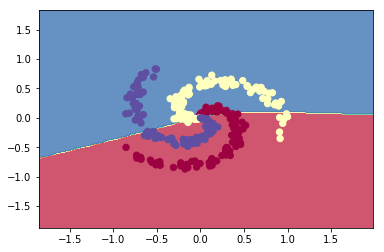

In [254]:
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()